<a href="https://colab.research.google.com/github/Jalink-lab/phasor-plots/blob/main/PhasorPlots_for_ATB_dummies_v2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pre-amble: phasorplots for Absolute, Total, Blond dummies......**

The minds of many students in the lifesciences turn numb as soon as they encounter even a single equation in a paper. This notebook is an effort to teach the analysis of FRET/FLIM by phasor plots to that part of the student audience, relying on two pillars: 1) the treatment builds up from high-school level in a -I hope- very intuitive way; and 2) it is built up in R, using ONLY base-R commands (i.e., it should run on any PC), and it uses numerical simulations rather that analytic math. This allows the user to interactively change many parameters (Tau, nr of photons, background, etc etc) and develop a very intuitive feeling for how this affects phasorplots.

It is assumed that the reader knows a tiny bit of coding in R, or can quickly read up on that. Reading through the actual codes should be easy, because I put in comments and because I go VERY slow with lots of repeats. I also recommend reading the code because it will prepare you to run simulations in R yourself, and it will allow you to modify any and all parameters and run code again. But even if you don't, the graphs should help intuitive understanding.

Use: run each of the code blocks in this notebook in turn. Note that in R you have to run the code blocks in order. If you return after running a later block, it may remember settings from those later code blocks. If this happens, just run previous code blocks in sequence again.

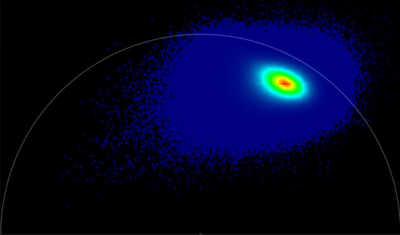-- 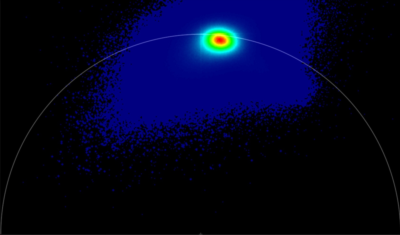

Phasor plots for high (left) and low (right) FRET states of our Epac sensor.
  
--


KJ, Summer 2023.  Comments are welcome!

----------------------------

Content:

PART 1. Intro's.

  >Intro 1: remember the exponential?

  >Why use phasor plots?
  
  >Intro 2: remember sinus and cosinus?
  
  >The sinus/cosinus transformation
  
PART 2. Phasor plots
  
  >The hemicircle

  >How coordinates line up on hemicircle for single exponential decay
  
  >How other parameters affect the phasor plot
  
PART 3. Using the phasor plot

  >Mixes of lifetimes: fluorescence + autofluorescence
  
  >FRET in a single-chain sensor
  
  >Why is it a straight line? Vector additions.
  
  >FRET + autofluorescence

  >Summary, disclaimer

PART 4. Extra assignments / for afficionados

  >Fluorescence + autofluo: vector addition

  >Comparing it to Gratton-lab FRET trajectories

---------------------


#PART 1. Intro's



##INTRO 1: what was an exponential decay, again?
The emission of photons from a population of excited fluorophores is random, that means: at any time, the instantaneous emission rate is a given fraction of the remaining excited molecules. At time = 0, we excite a population of fluorophores with a very brief pulse of laser light and we assume each of them will eventually emit a photon.

Let's say e.g. that in every nanosecond (ns) time that passes, 30% of fluorophores emit. Starting with nFluo = 1000 excited molecules, in the first ns 300 of them will emit. In the second ns, 30% of the remaining 700 molecules will emit, i.e., 210. In the third ns, 30% of 490 molecules will emit, that is 147, etc etc. Of course this decline goes gradually, and not in discrete steps of a ns.

Lets start by simulating nFluo photons emitted from nFluo excited fluorophores present in a single pixel. Setting the fluorophore lifetime to e.g. 1 ns, we generate ("model") the data using a built-in R function, **rexp**, which draws random numbers from an exponential decay (with default timeconstant Tau = 1 (ns)).

>Press the run button, wait for output, observe the data and repeat a few times.

 [1] 1.10472927 2.92491563 0.05736256 0.78079255 0.23273140 1.28534841
 [7] 2.20946970 1.20556150 0.01913285 1.18443459 1.82545834 1.00869566
[13] 2.01844479 0.46380561 0.72101580 0.99963158 1.43145198 1.12243408
[19] 0.78197443 0.27255193 0.64365285 2.99555481 0.80771201 0.32381196
[25] 0.56835805 0.93572104 1.77045959 0.52351957 0.65178423 0.48254800
[31] 0.12347453 0.18494612 0.08138756 0.58146415 0.28752371 2.62625949
[37] 0.03128216 0.39857135 0.01274065 0.28608762


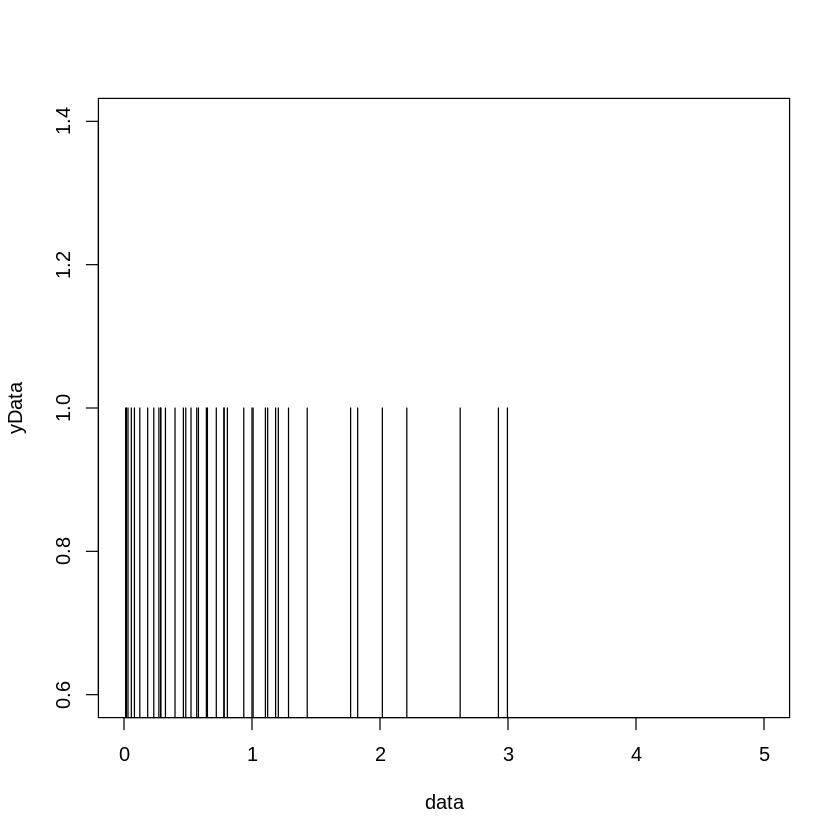

In [ ]:
nFluo = 40           #nr of fluorophores
data = rexp(nFluo)   #draw nFluo samples from a exponential distribution. This models nFluo photons emitted from nFluo dye excitations, arriving after the pulse(s)
print(data)
yData = rep(c(1), each = nFluo) #make nFluo times a '1' for y axis of first plot
plot(data, yData, type = "h", xlim = c(0,5))


Shown are the arrival times (in ns) of nFluo photons, and a graph illustrating what the detector would see. yData is just an array of values '1' to plot the vertical lines.
>New to R? Change nFluo = 40 into nFluo = 400 and run again.

We can equally simply make a histogram of that using build-in **hist** function of R:


 [1] 0.01727250 0.97658821 0.57399140 0.84593247 1.06476211 0.76858995
 [7] 1.24302359 0.01974514 0.00742628 0.85542209 1.50097906 0.26296334
[13] 1.60450799 0.49974519 0.11912115 0.31999913 0.44173486 1.63823600
[19] 2.32311786 0.10107032 2.29724215 0.71412107 1.51157962 1.19397731
[25] 0.75963956 3.47856633 0.14834653 0.94730954 0.69516914 0.36848486
[31] 1.07416459 0.91297324 0.31988318 1.19518079 0.03169941 4.32190974
[37] 0.45911160 0.83896843 2.01756331 0.05466023


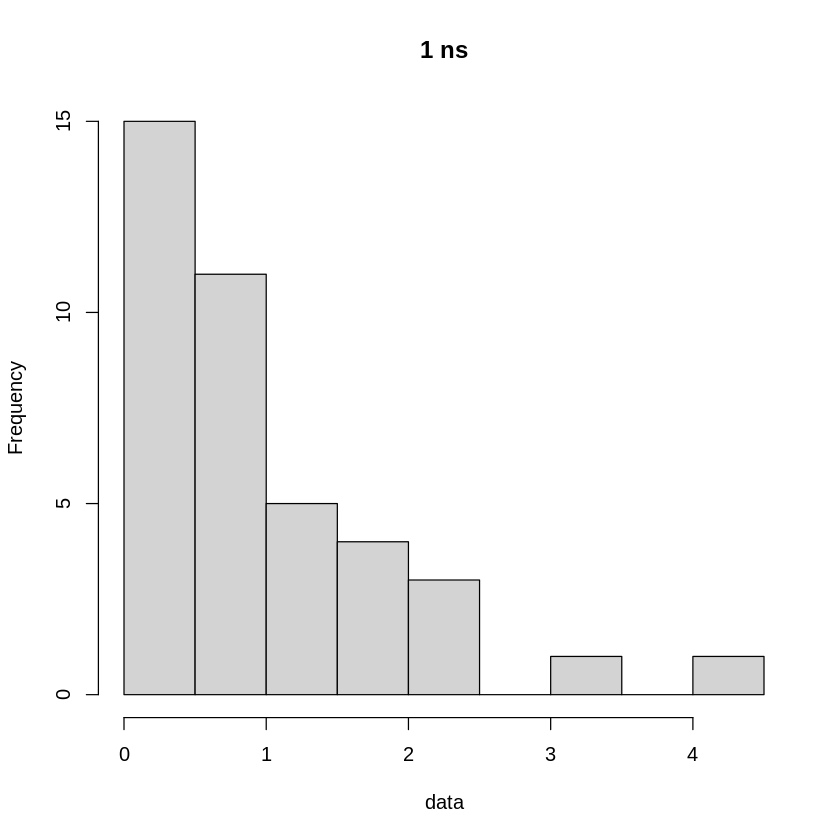

In [ ]:
nFluo =  40
data = rexp(nFluo) #draw nFluo samples from a exponential distribution for x axis
print(data)
hist(data, main = "1 ns")

>Again, press the run button to see how randomness affects the results from one run to the other. Also, try setting nFluo to 1000 and run the two code blocks again. Note that that makes the decay curve look much more regular.

Next, we will make exponential data derived from different time constants (Tau). Simply multiply the arrival times with 4 to get an exponential decay of 4 ns. <<By the way, some computergenius thought it is a good idea to use '*' instead of 'x' for multiplication..... Thus, 'A * B' reads as: 'A times B'>>

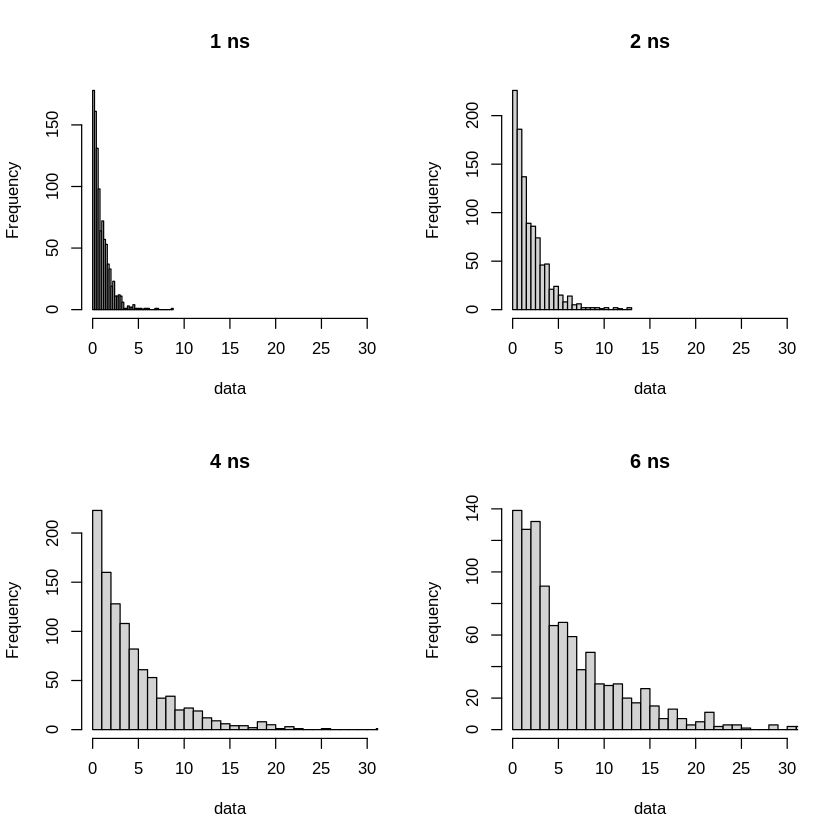

In [ ]:
par(mfrow = c(2,2))         #this will make 2 by 2 subplots
data = rexp(1000)           #this time we take 1000 fluorophores
hist(data, xlim = c(0,30), breaks = 40, main = "1 ns")   #and we fix the xScale and increase nr of bins for easy comparison
data = 2*rexp(1000)         #simply multiplying the result (data) with 2 will simulate a 2 ns decay
hist(data, xlim = c(0,30), breaks = 40, main = "2 ns")
data = 4*rexp(1000)         #and a 4 ns
hist(data, xlim = c(0,30), breaks = 40, main = "4 ns")
data = 6*rexp(1000)         #and a 6 ns
hist(data, xlim = c(0,30), breaks = 40, main = "6 ns")

Note that the Tau is inversely related to the decay rate: decay twice as high, Tau twice as small.

This is all just 3d grade high school material. If this would already be too complicated, you may want to give up and try for a career in another type of modelling. What *is* probably different from high school is that we treat these concepts using modelling by *computer simulations*, and not math which you may or may not understand. Using numerical simulations, it is very easy to generate arbitrarily complex in-silico experimental data. For example, below we create data that derive from a mix of Tau = 1 and Tau = 5 fluorophores.  


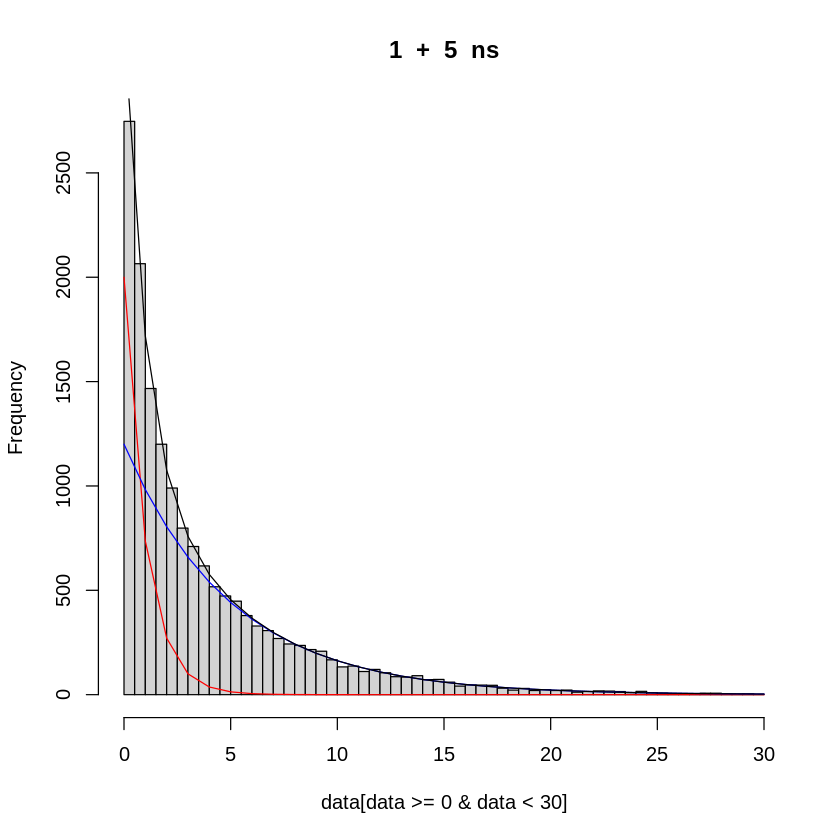

In [ ]:
nFluo1 = 4000
nFluo2 = 12000
Tau1 = 1
Tau2 = 5
data1 = Tau1 * rexp(nFluo1)
data2 = Tau2 * rexp(nFluo2)
data = append(data1, data2)           #and add the data together
hist(data[data >= 0 & data < 30], breaks=seq(0,30,by=0.5), main = paste(Tau1, " + ", Tau2, " ns"))

#and draw the theoretical lines to visualize how the histogram deviates from that
lines((0:30),((nFluo1/Tau1)*exp(-(0:30)/Tau1))/2, col = "red")
lines((0:30),((nFluo2/Tau2)*exp(-(0:30)/Tau2))/2, col = "blue")
lines((0:30),((nFluo1/Tau1)*exp(-(0:30)/Tau1))/2+c((nFluo2/Tau2)*exp(-(0:30)/Tau2))/2, col = "black") #division by 2 is because of half nanosecond binwidth


Bi-exponential decay with Tau = 1 and Tau = 5. For comparison, the red line is the theoretical population of a single exponent with Tau = 1, and the blue line that of a single exponent with Tau = 5.

Exponential decays are commonly analyzed by determining the best fit of the data with an exponential equation [see Definitions].

## Why use phasor plots?
You are reading this document because you (want to) use time-resolved fluorescence microscopy and want to understand FLIM data. You probably already know the advantages of going FLIM as compared to intensity measurements: FLIM data do not depend on fluorophore concentration, bleaching and dye leakage, they are insensitive to most microscope imperfections, fully quantitative, and they tell about the molecular environment of fluorescent probes. FLIM machinery is quite complicated, but fortunately the vendors took care of that part. But you will see FLIM data analyzed in a variety of manners, and often it is not too clear to the novice WHY a particular analysis was choosen.

In normal lifetime images, the signal in every pixel (column x, row y) is made up of photons that derive from fluorophores characterized by one or more exponential decays. The pseudocolors of the pixels are made to display lifetime, i.e. the image shows *time* and not *intensity*! Each pixel can only display one lifetime (usually the mean value of all decay constants). If you want to display the contributions of 2 or more lifetimes to that pixel, you will have to present one image for each lifetime component you want to show.

Phasor plots are fundamentally different in that the pixels are not sorted by (x,y) coordinate in the image, but by composition of the different lifetime components present in those pixels. Every dot in the phasor plot corresponds 1:1 to a pixel in the original image (1 pixel in the flim pic yields one dot in the phasor plot), but its location in the phasor plot is not determined by (x,y) coordinates or by fluorescent intensity, rather by the different components of its lifetime ("compound lifetime"; see Definitions). Different pixels with the same compound lifetime end up in the same spot in the phasor plot. On the other hand, a pixel with 20% of 1 ns and 80 % of 3 ns contribution will be at a different spot than one with 30% and 70% contributions of those decay times.  And a mix of 30% of 1 ns + 70% of 5 ns will in the phasor plot end up at a distinctly different position than 10% of 2 ns and 90% of 4 ns, even though the average lifetime in these pixels is exactly the same in the lifetime image.

Why would one use this rather un-intuitive approach, these phasor plots? The exponents we have investigated in intro 1 are quite intuitively characterized by FITTING with a curve {y = exp(-t/Tau)}. And multiple components could be fitted with 2 or more exponents simultaneously. Yet, there are a few big advantages of using phasor plots. First, (multi-)exponential fitting is VERY computing-intensive, and fitting of large time-lapse series of images can easily take more time than the experiment itself. In contrast, making phasor calculations is much faster. Second, as we will see below, phasor plots immediately reveal a number of important properties of the FLIM values graphically. We can immediately see which pixels have pure single-exponential decay, and which have more complex decay (as well as what the characteristics of that decay are!). Phasor plots do not replace lifetime images, they provide an additional view on the data: they summarize the abundance of various compound lifetimes in your image, and we can go back and forth and examine the properties of pixels in both visualizations. So let's investigate phasor plots. First, one more intro on sine and cosine which you may skip if familiar with it.

----------


[DEFINITIONS]

<i>Curve fitting: a method to determine the best 'overlap' (fit) of a set of data points with a theoretical model (a line, a curved line, a complex shaped line or mathematical function).

Compound lifetime: the mix of photons deriving from 1 or more dyes each with their own characteristic lifetime.

Phasor or Vector: a line segment with a certain length and a certain direction. Usually shown as an arrow. See later in this document.

Head-to-tailing vectors: when adding up 2 or more vectors, they are placed 'head-to-tail', and the result of that is a new vector that starts at the tail of the first vector, and ends at the head of the last vector that is added. The order in which one adds the vectors is not important, the outcome is always the same. The operation should be quite intuitive: if one walks 1 km north-east, followed by one kilometer south-east, and then 2 km due east, the net outcome is that you travelled ~3.4 km due east, as a simple drawing to scale will show you.</i>

------------



## INTRO 2: remember sinus and cosinus?
Next, remember the cosine and sine functions? Just to remind you, consider a unit circle (i.e., with radius 1), with center at the origin (0,0) of the x and y axis. See https://en.wikipedia.org/wiki/Sine_and_cosine

Now, the angle of a linepiece pointing to that circle at 3 o'clock is defined as zero degrees (it sits on the x-axis at point (1,0)). But rather we say: the projection of that linepiece on the Y axis = 0 (or: its sine value = 0), and its projection on the X axis = 1 (or: its cosine = 1). Comes back to you?

Now if we rotate the point along the circle COUNTERCLOCKWISE, which is defined as a rotation in the positive direction, then the projection on the X axis becomes smaller and that on the Y axis becomes bigger. Until at 90 degrees, the sine = 1, and the cosine = 0. The point on the circle has then travelled a length of 1.57 times the radius of the circle, the angle is 90 degrees. Furthermore, half a circle has travelled PI (3.1415), a full circle = 2*PI.

Also 3d grade highschool. Let's visualize by plotting the sine and cosine:

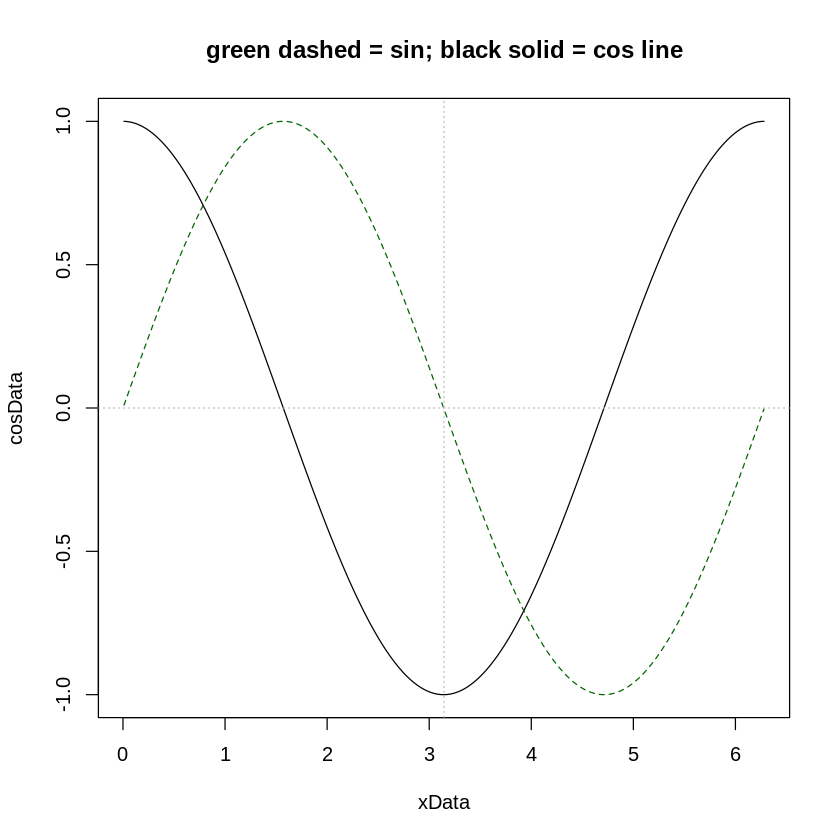

In [ ]:
xData = 0.01*(1:628)     # make xdata between 0 and 2*PI in steps of 0.01
cosData = cos(xData)     # and take the cosine and sine of that. NOTE this is NOT a simulation, just calculated data.
sinData = sin(xData)
plot(xData, cosData, type = 'l', main="green dashed = sin; black solid = cos line")      #solid is cosine
lines(xData, sinData, lty = 2, col="darkgreen")         #striped is sine

#just an embellishment of the graph; not essential for understanding
grid(nx = 2, ny = 2, col = "gray")

Now we can make things a lot more complicated with sine and cosine, but this is all we need to know and it's all third grade highschool math.



##The sinus / cosinus transformation

HERE COMES THE TRICK: how can we use the sine and cosine functions to extract info about the time constant of the exponential decay? You will see that you just need to multiply it with the cosine as well as with the sine. How does that work? First, let's display a fast exponential decay overlapping the previous graph:

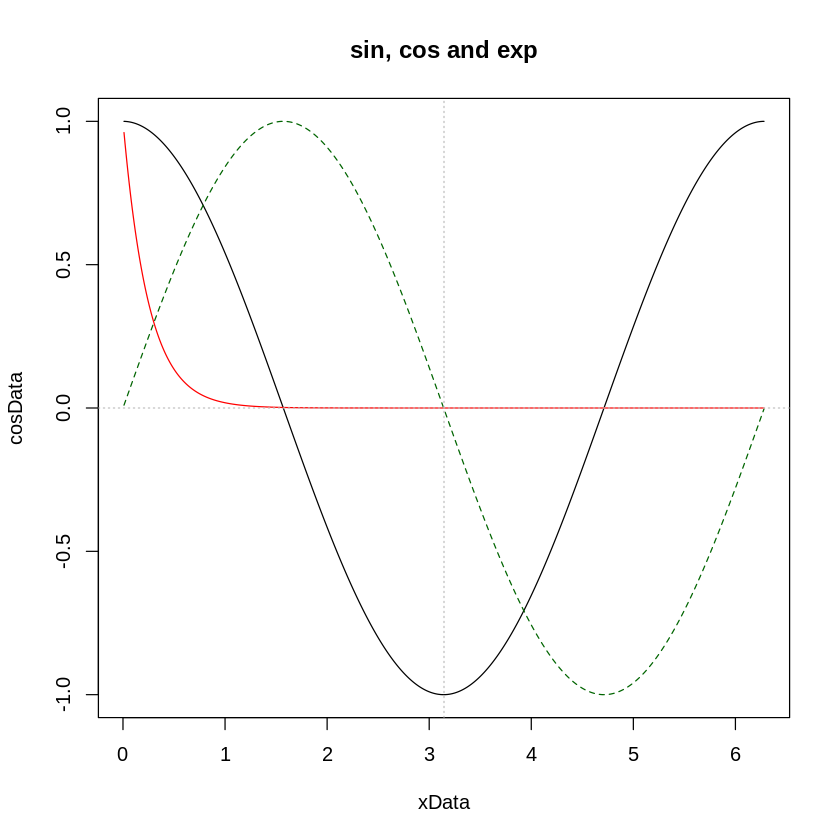

In [ ]:
xData = 0.01*(1:628)     #make xdata between 0 and 2*PI in steps of 0.01
cosData = cos(xData)     # and take the cosine and sine of that. NOTE this is NOT a simulation, just calculated data.
sinData = sin(xData)
plot(xData, cosData, type = 'l', main = "sin, cos and exp")   #plot the cosine again.
lines(xData,sinData, lty = 2, col="darkgreen")                #striped is sine

Tau = 0.25               #lifetime in ns
decayRate = 1/Tau
expData = exp(-decayRate*xData)    #want to know why I took 4 times Xdata? Change that value and plot again!
#Note that the exponent displayed here also is a analytic curve, NOT simulated data, because we do not need to reckon with statistical noise

lines(xData, expData, col = "red") #overlay it with the short-lived exponential

#below just an embellishment of the graph; not essential for understanding
grid(nx = 2, ny = 2, col = "gray")

>And now we simply multiply the exp with Cos and Sin, point by point

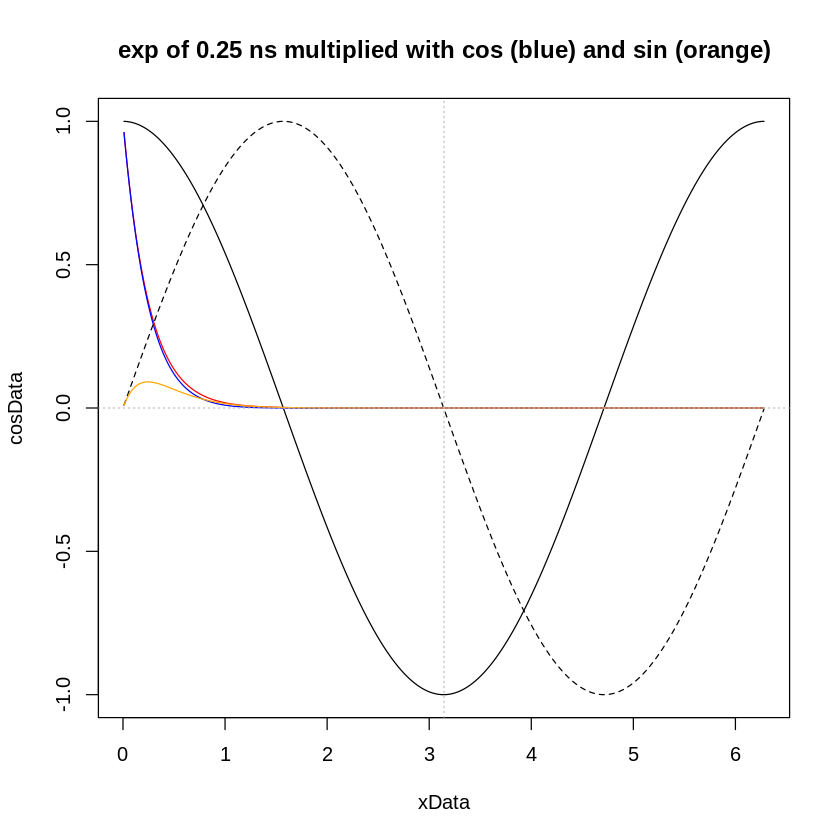

In [ ]:
xData = 0.01*(1:628)     #make xdata between 0 and 2*PI in steps of 0.01
cosData = cos(xData)     # and take the cosine and sine of that. NOTE this is NOT a simulation, just calculated data.
sinData = sin(xData)
plot(xData, cosData, type = 'l', main = paste("exp of", Tau, "ns multiplied with cos (blue) and sin (orange)"))   #plot the cosine again
lines(xData,sinData, lty = 2)        #striped is sine
lines(xData, expData, col = "red")   #overlay it with a short-lived exponential. These data are still in memory from the previous code block
# I have plotted sine, cosine and exponential again
expXcos = cosData*expData            #multiply exp with cosine, point by point
expXsin = sinData*expData            #and with sine
lines(xData, expXcos, col = "blue")  #and plot the results too
lines(xData, expXsin, col = "orange")

#below just an embellishment of the graph; not essential for understanding
grid(nx = 2, ny = 2, col = "gray")

The blue line is the result of multiplying the exponent (red) with the cosine (solid line), the orange line is the same exponent multiplied by the sine. You see that for such a short Tau, almost all the emission shows up in the exp\*cos curve (blue), and just a tiny little bit in the exp\*sin curve (orange). We can simply determine how much, by taking the total area under the blue and orange curves, respectively. And we will 'normalize' that by dividing those with the <b>sum</b> of the area in the exponential data, creating two values, Xnormalized (Xn) and Ynormalized(Yn).

*In literature, these are often called G and S, respectively, but I will keep calling them Xnormalized and Ynormalized because it reminds you of what they represent.* To calculate, run next code block.



In [ ]:
E = sum(expData)      #if this one crashes, you have to run previous code again, because it uses those data
X = sum(expXcos)
Y = sum(expXsin)
print(E)
print(X)
print(Y)
#and finally, lets normalize that by expressing X and Y as a fraction of the total intensity, E:
Xn = X/E              #Xn stands for Xnormalized
Yn = Y/E
print(' Above are intermediate results E, X, Y; below are X and Y normalized to total emission intensity:')
print(Xn)
print(Yn)
print("Note that the majority of intensity is on the X-axis (cos)  with only a fraction in Y (sin)")

[1] 24.50333
[1] 23.03275
[1] 5.88152
[1] " Above are intermediate results E, X, Y; below are X and Y normalized to total emission intensity:"
[1] 0.9399842
[1] 0.2400294
[1] "Note that the majority of intensity is on the X-axis (cos)  with only a fraction in Y (sin)"


So far, we have (Xn, Yn) which will become a data point corresponding to a short exponential in the phasor plot. So the important thing is: for this very short exponent, the majority of the photons overlap with the cosine, and only a fraction with the sine curve. After normalizing, this means the cosine component is almost 1, and the sine component is small. If this is unclear at the moment, take a look at the next 2 graphs.

For that, let's next explore what happens if the exponent Tau becomes larger. We simply run the previous code blocks again, but now for a lower value of decayRate.

[1] 99.31443
[1] 49.4078
[1] 49.90579
[1] " and normalized to emission intensity:"
[1] 0.4974886
[1] 0.502503
[1] "Now the fraction of the intensity on the X-axis (cos) is about the same as the fraction in Y (sin)"


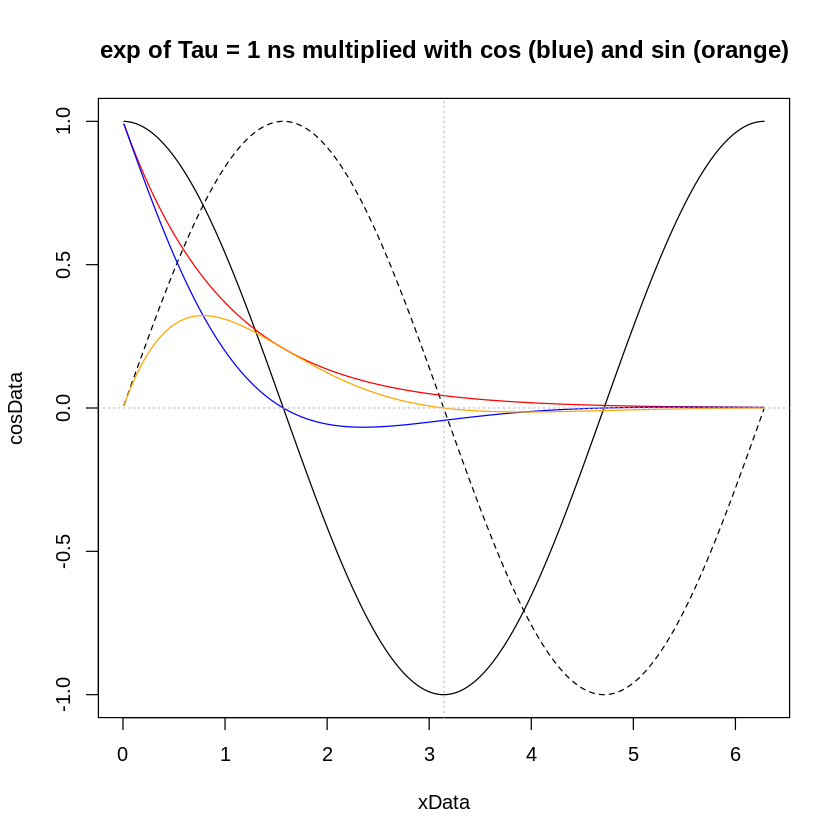

In [ ]:
Tau = 1                              #it was 0.25, now raise it to 1
decayRate = 1/Tau
expData = exp(-decayRate*xData)
plot(xData, cosData, type = 'l', main = "exp of Tau = 1 ns multiplied with cos (blue) and sin (orange)")     #plot the cosine again
lines(xData,sinData, lty = 2)        #striped is sine
lines(xData, expData, col = "red")   #overlay it with a medium-lived exponential
expXcos = cosData*expData            #multiply again
expXsin = sinData*expData
lines(xData, expXcos, col = "blue")
lines(xData, expXsin, col = "orange")
grid(nx = 2, ny = 2, col = "gray")   #embellishment

E = sum(expData)
X = sum(expXcos)
Y = sum(expXsin)
print(E)
print(X)
print(Y)
#and finally, lets normalize that by expressing X and Y as a fraction of the total intensity, E:
Xn = X/E
Yn = Y/E
print(' and normalized to emission intensity:')
print(Xn)
print(Yn)
print("Now the fraction of the intensity on the X-axis (cos) is about the same as the fraction in Y (sin)")

See how the blue line, 'exp times cosine', now is significantly less than the exponent (red line), and it even goes negative around x = 2. When we sum all the data, the negatives are subtracted from the positives, naturally. The important thing is that this longer Tau overlaps significantly with both the sine and the cosine. And therefore the ratio between Xn and Yn seems to contain information about the value of Tau.

And just to be overly clear, we do it for an even lower decay rate:

[1] 262.5792
[1] 25.82829
[1] 78.91611
[1] " or normalized to emission intensity:"
[1] 0.09836381
[1] 0.3005421
[1] "Now the fraction of the intensity on the X-axis (cos) is actually less than in Y (sin)"


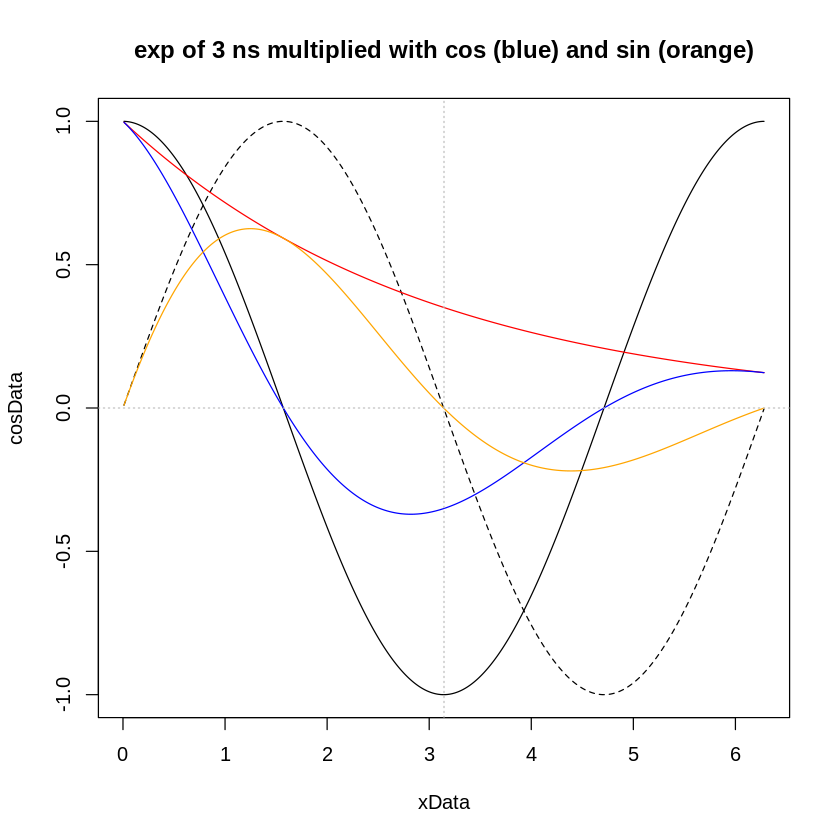

In [ ]:
Tau = 3
decayRate = 1/Tau
expData = exp(-decayRate*xData)
plot(xData, cosData, type = 'l', main = "exp of 3 ns multiplied with cos (blue) and sin (orange)")   #plot the cosine again
lines(xData,sinData, lty = 2)        #striped is sine
lines(xData, expData, col = "red")   #overlay it with a short-lived exponential
expXcos = cosData*expData            #multiply again
expXsin = sinData*expData
lines(xData, expXcos, col  =  "blue")
lines(xData, expXsin, col  =  "orange")
grid(nx  =  2, ny = 2, col = "gray")

E = sum(expData)
X  = sum(expXcos)
Y = sum(expXsin)
print(E)
print(X)
print(Y)
#and finally, lets normalize that by expressing X and Y as a fraction of the total intensity, E:
Xn = X/E
Yn = Y/E
print(' or normalized to emission intensity:')
print(Xn)
print(Yn)
print("Now the fraction of the intensity on the X-axis (cos) is actually less than in Y (sin)")

We see Xn (this is sum(cos*exp)) go towards zero. That is because part of the exponent is now multiplied by negative values of cos for X > Pi/2.

***In other words, the relationship between Xn and Yn contains info on the exponential decay rate, and this is in a very predictable way.***

(1) when Tau is very short, all intensity is in sum(exp\*cos) and none in sum(exp\*sin), yielding the
coordinate (1,0).

(2) at some longer Tau, equal amounts of intensity end up in sum(exp\*cos) and in sum(exp\*sin), yielding
the coordinate (0.5, 0.5). and

(3) at extremely long Tau, both sum(exp\*cos) and sum(exp\*sin) are zero because positive and negative halfs of both sin and cos functions cancel out, yielding (0,0). So this explains the halfcircle shape and size which we will see below.

This little handwaving should give you a good feeling of what is happening when we multiply the exponents with either sine or cosine.



**Post-amble.** One obvious question often asked by students is: WHY? Why would you do this? How do you know from the start that this is a fruitful way to go?

Answer: you do this just because you CAN, there is no law against multiplying things and it turns out to be a nice way to look at FLIM data. The idea initiated over 250 years ago from a French guy named Fourrier, and this type of analysis is now omnipresent in technology, and yes, you have to be some sort of a genius to come up with these things yourself. But more importantly, it turns out to be a blazingly fast way of analyzing the data, because curve fitting (the more conventional and computing-intensive way to determine exponential decay speed) is not involved.  

#PART 2. Phasor plots



##The hemi-circle
Now lets simulate some data and start playing: I am going to define an array with a number of Tau's for which we will plot the phasors, as well as arrays to contain the coordinates (Xn, Yn). Then we generate simulated data based on those Tau's and analyze them as above, followed by plotting them on a normal (carthesian) axis graph.

[1] "The Taus that will be plotted are: (in ns)"
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30


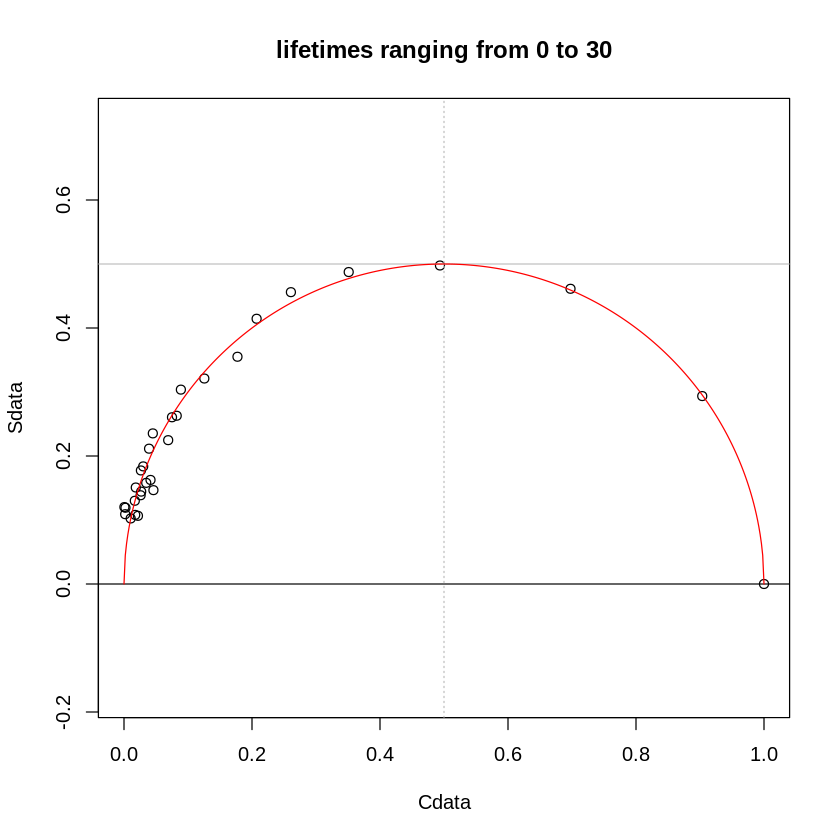

In [ ]:
maxTau = 30          #Set the maximum Tau that is to be plotted
aantal = 30          #I am going to simulate 'aantal' different Taus, ranging from 0 to Tau
nFluo = 5000         #each exponent will consist of nFluo photons, drawn randomly from a exponential distribution
freq = 3             #in addition, we can choose the frequency of the sine and cosine we are using for the multiplication.

#initialize 2 arrays to store the sine and cosine data for each lifetime
Sdata = 0:aantal
Cdata = 0:aantal
Ldata = maxTau*(0:aantal)/aantal  #this 'LifetimeData' array holds 'aantal+1' lifetimes to be plotted, in this case from 0 to Tau ns.
print('The Taus that will be plotted are: (in ns)')
print(Ldata)
#each of the Tau's in Ldata is going to be plotted.

for(k in 1:aantal){                           #For each of the chosen lifetimes, do the following:
  data = Ldata[k]*rexp(nFluo)                 #generate data, an array of randomly drawn samples from an exponential distribution with lifetime as indicated in Ldata[k]
  Sdata[k] = sum((sin(data/freq)))/nFluo      #this is it; only 2 lines of code, they do exactly what we did in the code of the previous block.
  Cdata[k] = sum((cos(data/freq)))/nFluo      #i.e., normalize the sum of all values obtained by multiplying 'sin x data' and 'cos x data'. We store them in Sdata[] and Cdata[]
}
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55), main = paste("lifetimes ranging from 0 to",Tau), asp = 1)

#embellishments. non-essential
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
grid(nx = 2, ny = 0, col = "gray")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

You see that all the data points miraculously line up on a hemicircle. The red line is just a half circle with centre (0.5, 0) and radius 0.5 that I have drawn in after making the rest of the graph.

You should also note that the short lifetimes are more spread apart than the long lifetimes in this hemicircle representation.

And you also see that some data points are not quite on the circle. That is because we determine the data by randomly drawing from an exponential distribution. In other words: it is exactly the same noise you would also encounter during an experiment.

THAT'S ALL!! You see that the sine/cos transformation makes all data from PURE exponentials line up on the hemicircle.

Next, we want to get some feeling on how this behaves. Predict the effect of, and then try by running:

>DO:(1) Set nFluo to 20000, run again.

>DO:(2) Set Tau to 5 & run again, then to 2, then back to 30

>DO:(3) Set aantal to 30. Where is 1 ns? Set aantal to 600 and run again. Set to 30 and keep it there



##How the parameters affect the details of the phasor plot
Now there is one thing left to explore for pure exponential decays: How does the plot change when we increase the frequency of the sine and cosine waves? Lets, for ease, first make a R function of our code, this prevents us from typing the same code time and time again:

In [ ]:
maxTau = 30           #Set the maximum Tau that is plotted
aantal = 30           #I am going to simulate 'aantal' different Taus, ranging from 0 to Tau
nFluo = 10000         #each exponent will consist of nFluo photons, drawn randomly from exp distribution
freq = 3              #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
Ldata = maxTau*(0:aantal)/aantal                   #this 'LivetimeData' array holds 'aantal+1' lifetimes to be plotted, in this case from 0 to Tau ns.

PhasorFunction = function(Ldata, aantal = 30, nFluo = 10000, freq = 3, title = ""){  #Now this is the way to define a function, doing the same as the previous code block
  Sdata = 0:aantal
  Cdata = 0:aantal

  for(k in 1:aantal){                        #For each of the lifetimes, do:
    data = Ldata[k]*rexp(nFluo)              #generate data, an array of randomly drawn samples from an exponential distribution with lifetime as indicated in Ldata[k]
    Sdata[k] = sum((sin(data/freq)))/nFluo   #this is, in 2 lines, exactly what we did in the code of the previous block.
    Cdata[k] = sum((cos(data/freq)))/nFluo
  }
  plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55), main = title, asp = 1)

  #embellishments. non-essential
  grid(nx = 2, ny = 0, col = "gray")
  lines(c(-0.1,1.1),c(0,0))
  lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
  Xc = 0:500
  Xc = Xc/500
  Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
  lines(Xc, Yc, col = "red")
  lines(c(-0.1,1.1),c(0,0))
}   #End of definition of function

print("this has made the code into a function that we can conveniently call as often as needed")
print(freq)

[1] "this has made the code into a function that we can conveniently call as often as needed"
[1] 3


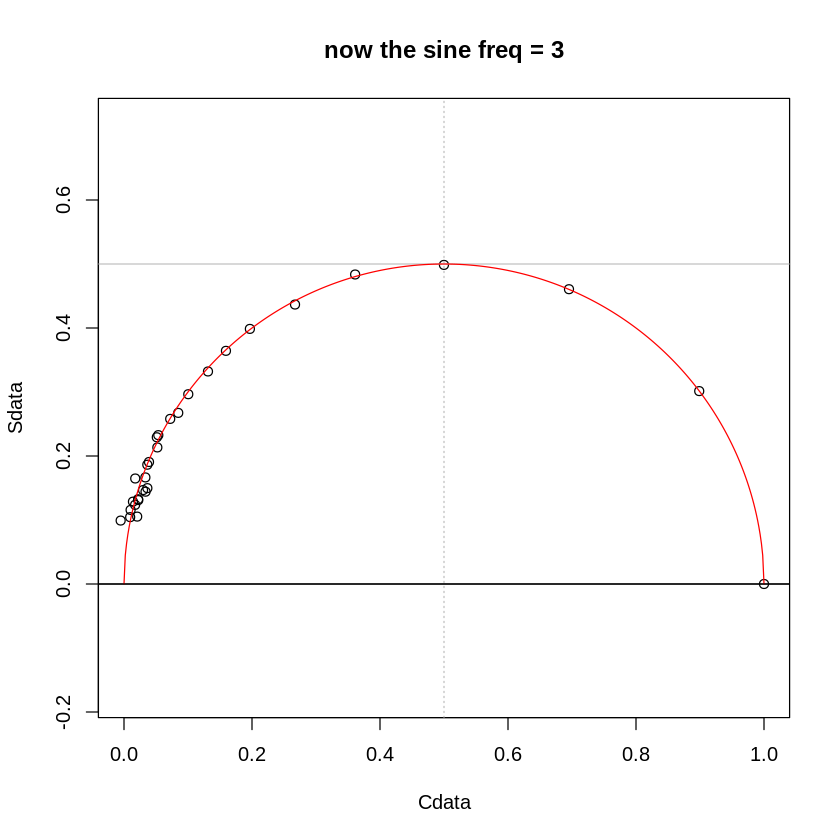

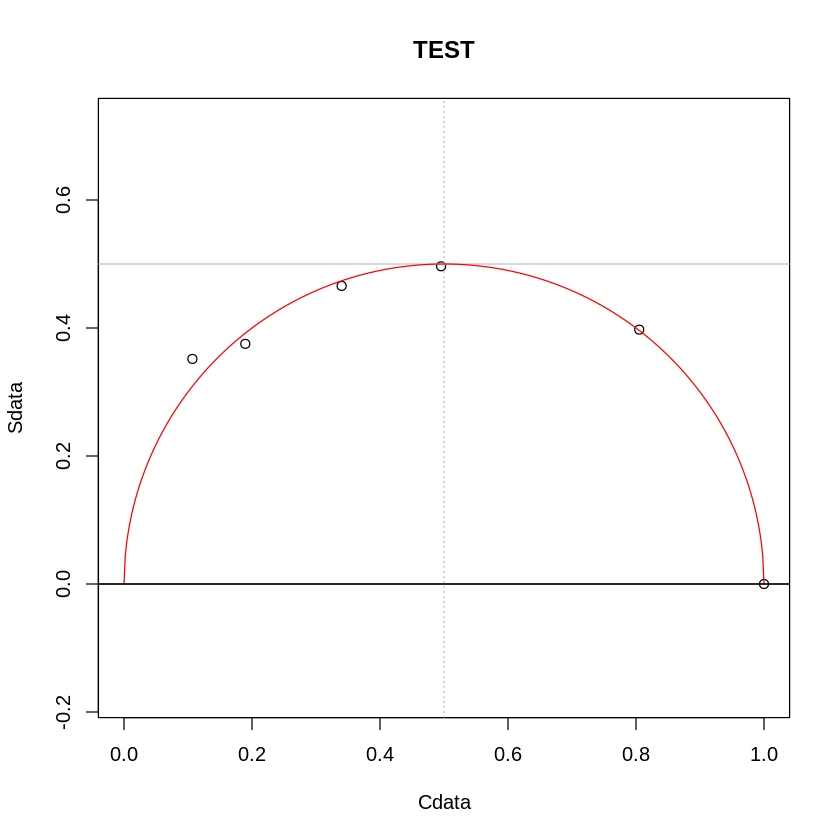

In [ ]:
#and next, we call it to draw, with the parameters indicated between ( )
PhasorFunction(Ldata,aantal,nFluo,freq, "now the sine freq = 3")

#You could, e.g., also call the function by plugging in values directly.
PhasorFunction(c(0,1,2,3,4,5), 6, 2000, 2, "TEST") # another example of calling our function

With this we can easily plot for e.g. different freqs. We use the lifetimes generated in the code block before this, i.e. by default
, 0, 1, 2, ....29, 30 ns or you may custom-shape it, as in the 2nd example above.

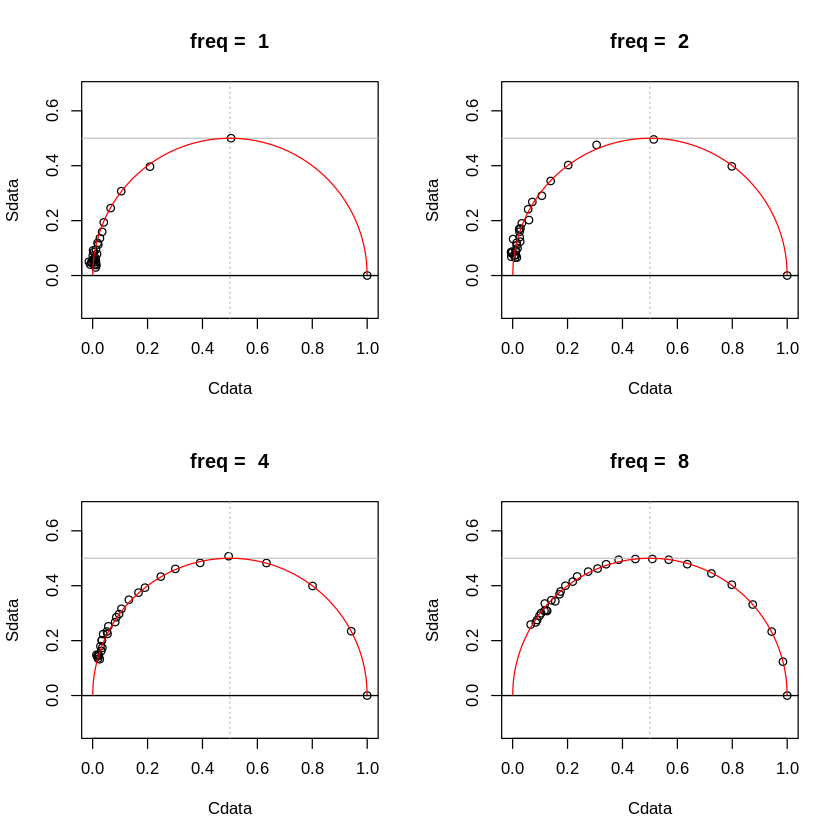

In [ ]:
par(mfrow = c(2,2))          #this will make 2 by 2 subplots
freq = 1
PhasorFunction(Ldata,aantal,nFluo,freq, paste("freq = ", freq))
freq = 2
PhasorFunction(Ldata,aantal,nFluo,freq, paste("freq = ", freq))
freq = 4
PhasorFunction(Ldata,aantal,nFluo,freq, paste("freq = ", freq))
freq = 8
PhasorFunction(Ldata,aantal,nFluo,freq, paste("freq = ", freq))

So we see that the position of each particular lifetime on the hemicircle depends on the frequency of the sin/cos we use to analye it. The dots represent Tau = 0, 1, 2 ... to Tau = 30 ns in each of the panels. By the way, did you notice that with freq = 2, the top of the hemicircle corresponds to 2 ns, etc?

Some vendors allow doing this using a setting called 'Harmonics'. This suggests you can only use integer multiples for freq, but in fact, you can also set it to e.g. 2.335 if you want.

**Next**, lets look at ***repeatability*** by running the simulation for each Tau several times. This is where computer simulations really become powerful, the modelling simply recapitulates the noise (random fluctuations) too!

 [1]  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  4  4  4  4  4
[26]  4  4  4  4  4  6  6  6  6  6  6  6  6  6  6 10 10 10 10 10 10 10 10 10 10


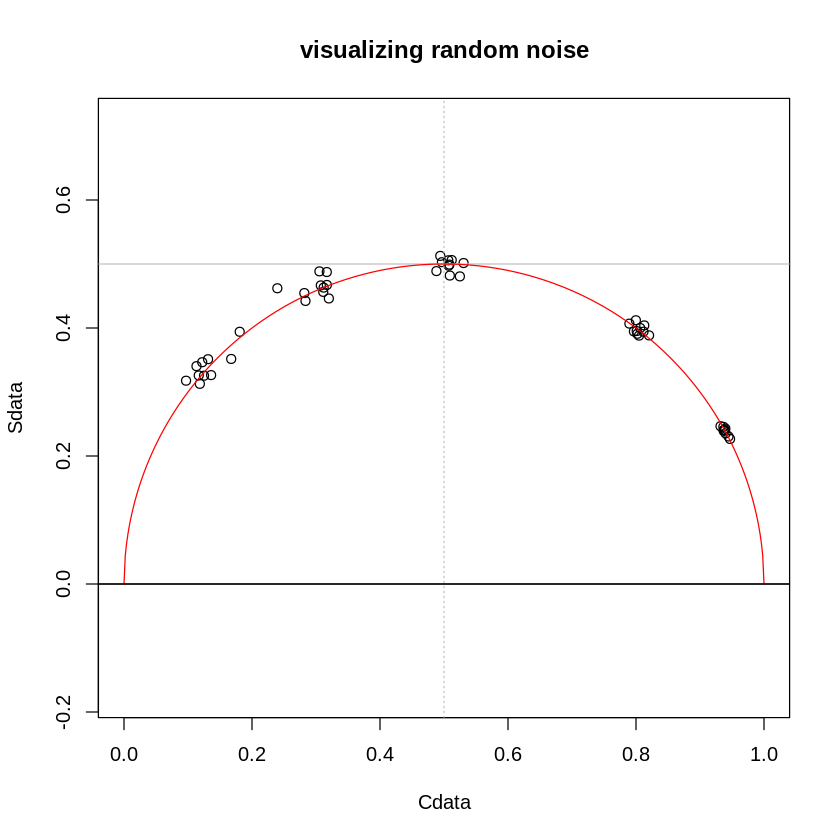

In [ ]:
Ldata = rep(c(1,2,4,6,10), each = 10)    #'each = 10' means: repeat each value in the Ldata list 10 times
print(Ldata)
aantal = length(Ldata)
freq = 4
nFluo =  1000
PhasorFunction(Ldata,aantal,nFluo,freq, "visualizing random noise")

>DO: Now run that again but first set nFluo to 500, then 2000, then 20000.

This concludes my treatment of the basic hemicircle.

# PART 3. Using the phasor plot



## Mixes of lifetimes: fluorescence + autofluorescence.

In part 3 we look at some more realistic 'preps' in which, next to fluorophores, also background (auto) fluorescence is included. And we examine a FRET sensor.

The cool thing in simulations is that we can make the model arbitrarily complex without running into completely undoable math. For example, we can just  generate data in silico that consist of part autofluorescence, with a short lifetime of 0.5 ns, part fluorescent dyes with a different lifetime, and than just run all the same code to create the plots.

To arrive at the next phasor plot, I only had to change a few things in the code:

1) I added a variable `TauBkGrnd = 0.5` that defines the background lifetime and makes it easy to run the model with different background lifetimes.

2) I introduced `fractionBkGrnd = 0.2` to make it easy to simulate with different percentages of background. I choose to make the background a fraction of the total photons, so:

3) `nFluoBkGrnd = round(nFluo*fractionBkGrnd)`

4) and consequently, the remainder is the nr of emisions for the fluorophore:
`nFluo = nFluo-nFluoBkGrnd`. Thats all to prepare for a single line of 'real' change:

5) replace the statement

`data = Ldata[k]*rexp(nFluo) `     
with

`data = append((Ldata[k] ⋆rexp(nFluo)), TauBkGrnd ⋆rexp(nFluoBkGrnd)) `
In other words, the data are just partly drawn from an exponent with autofluorescence Tau (0.5 ns), and partly from the exponent of the fluorophore and then appended. If you need 3 or more exponents, just repeat that process.



 [1]  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  4  4  4  4  4
[26]  4  4  4  4  4  6  6  6  6  6  6  6  6  6  6 10 10 10 10 10 10 10 10 10 10


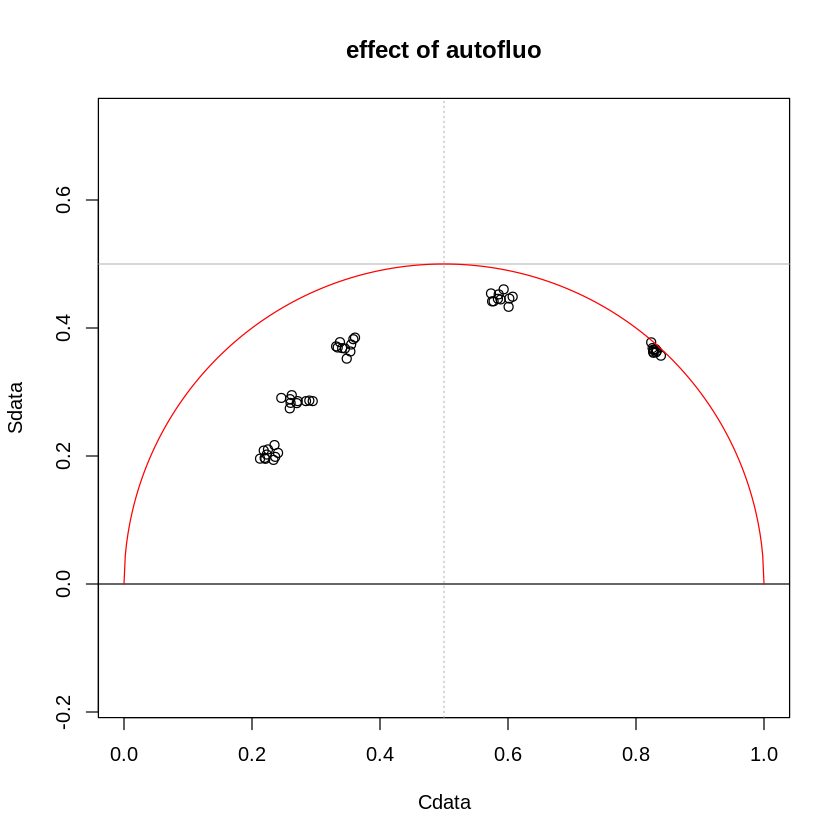

In [ ]:
nFluo = 3000          #each complex exponent will consist of nFluo photons, drawn randomly from exp distribution
freq = 2              #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
TauBkGrnd = 0.5       #in this version, a fraction 'fractionBkGrnd' of those photons actually derive from BkGrnd with Tau = 0.5 ns
fractionBkGrnd = 0.2  #<<<<<<<<< THIS is the main one to play with. You may also try changing TauBkGrnd, nFluoBkGrnd changes
nFluoBkGrnd = round(nFluo*fractionBkGrnd)
nFluo = nFluo-nFluoBkGrnd
Ldata = rep(c(1,2,4,6,10), each = 10)   #run the simulation for each of the Tau's in Ldata. <<<<<<<<< THIS one to play with too
aantal = length(Ldata)
print(Ldata)

       #initialize 2 arrays that will contain the sine and cosine data
Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 1:aantal){
  data = append((Ldata[k]*rexp(nFluo)), TauBkGrnd*rexp(nFluoBkGrnd))  #part of the photons from Fluo, part from BkGrnd
  Sdata[k] = sum((sin(data/freq)))/(nFluo+nFluoBkGrnd)
  Cdata[k] = sum((cos(data/freq)))/(nFluo+nFluoBkGrnd)
}
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55), main = "effect of autofluo",asp = 1)


#embellishments. non-essential
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
lines(c(-0.1,1.1),c(0,0))
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

And of course we play with the settings to see how the plot behaves:
>DO: Play with values of TauBkGrnd, fractionBkGrnd and Ldata.

You see that the presense of the small lifetime from autofluorescence 'pulls' all the data points for longer lifetimes in its direction. If this is unclear at the time, I have an extra assignment as addendum at the end.

##FRET in a single-chain biosensor

Next, lets look at a FRET sensor like our Epac sensor which changes lifetime when cAMP binds to it. This sensor consists of a donor, a cAMP binding protein that UNfolds when bound to cAMP, and an acceptor. In rest, only part of sensors are bound to cAMP and the sensor displays about 50% FRET. We will start from the saturated, low-FRET situation, i.e. all sensors have long lifetime. As cAMP decreases, less and less cAMP binds and more and more sensor molecules fold closed, and thus show higher FRET. We therefore need to introduce in the model a population of FRET sensors that changes state, such that (Sbound + Sfree) = constant. We also need to introduce the FRET quenching in the model, i.e., a sensor with high FRET is LESS BRIGHT than a sensor with low FRET, simply because it looses photons (actually, it looses excited states) to the acceptor. In this first model, we assume background is zero.

What are the changes we need to apply?

1) First, we want to plot the FLIM phasor for many different cAMP concentrations of cAMP. So we define an array of different % bound:

`binding = (0:100)/100`,

that is: (the numbers from 0 to 100)/100, or 0, 1, 2....100%

where 0% corresponds to no cAMP binding (HIGH FRET state; note, this is NOT 100% FRET because the FRET sensor has a lifetime of about 1.0 ns when nothing is bound), and 100% bound corresponds to the LOW FRET state, the lifetime of which is very close to that of mTurquoise2, 3.8 ns).

2) Then we define how much dimmer the sensor is when in its high-FRET state: that is proportional to increase in FRET efficiency E, i.e., about 3.8 times dimmer. This is important because the high-FRET sensor emits thus 74% less photons than the low-FRET sensor, and we have to take this in account when calculating the fraction of photons that are emitted by each of the two states.

3) Then the loop is modified so that for each iteration, it calculates how much photons are emitted by the binding and unbinding state:


  `unbindingPhotons = nFluo*(1-binding[k])`

  `bindingPhotons = nFluobinding[k] * (1-quenching)`

4) And finally, the double-exponential decay for that particular mix of bound and unbound is calculated again by appending the data from two random draws from the two exponentials:

`data = append(Tau * rexp(unbindingPhotons), Tau * (1-quenching) * rexp(bindingPhotons))`

i.e., drawn from 2 populations, the fraction of unbound sensors times Tau, and the fraction of bound sensors times quenching times Tau.
>For those of you who still figure the code out line by line: WHY do I express the second term Tau as "Tau *(1-quenching)"? Because the FRET LOWERS the lifetime by the same amount as it quenches the intensity. It's a brief way to make the FRETting Tau follow whatever we set quenching to be.


Again, the simulation approach allows you to make the model arbitrarily complex without having to do the math any different: we just run the same analysis, but now on a different set of photons.


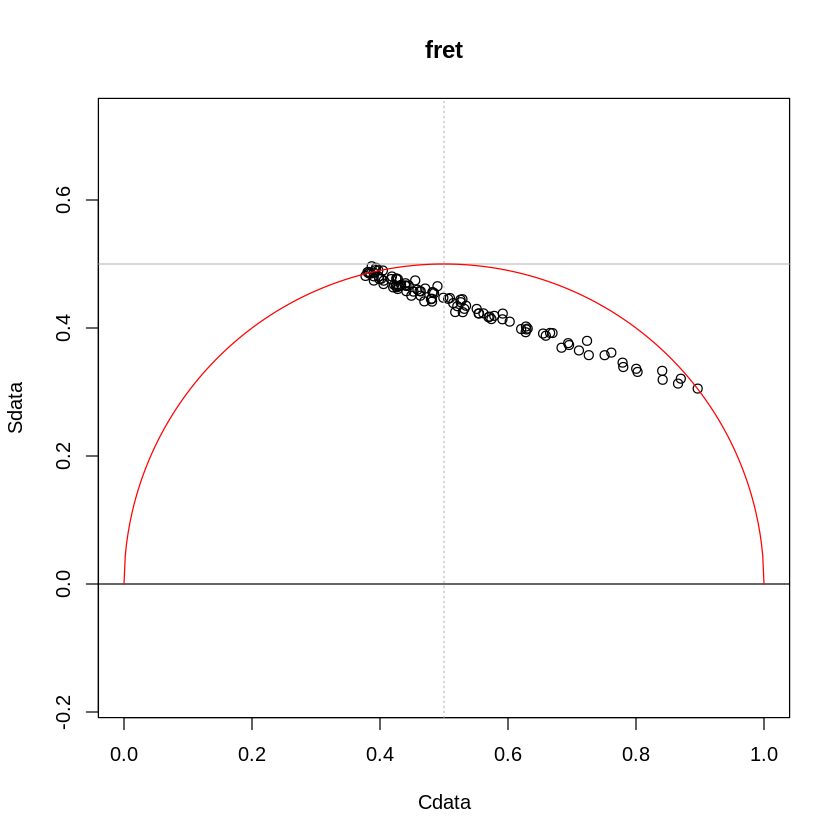

In [ ]:
nFluo  =  5000         #each exponent will consist emission of nFluo sensors
freq  =  3
Tau = 3.8              #Tau of sensor in low-FRET state
TauQuenched = 1
binding = (0:100)/100  #fraction ligand binding to the FRET sensor
quenching = Tau/TauQuenched        #FRETting sensor is a factor 'quenching' dimmer. Naturally, the Tau is same fraction faster when FRETting.
aantal = length(binding)

Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 0:aantal){    #for each different binding %, do the next lines:
  unbindingFluo = nFluo*(1-binding[k])
  unbindingPhotons = unbindingFluo/quenching  # the bound sensors FRET, so they are quenched by a factor quenching
  bindingFluo = nFluo-unbindingFluo
  bindingPhotons = bindingFluo                # each of them emits a photon, i.e. quantum yield is assumed to be 1

  data = append(rexp(unbindingPhotons, 1/TauQuenched), rexp(bindingPhotons, 1/Tau))  #so, simulate bindingPhotons from exp distribution with Tau, and unbindingPhotons from exp distribution with TauQuenched
  Sdata[k] = sum((sin(data/freq)))/(bindingPhotons+unbindingPhotons)
  Cdata[k] = sum((cos(data/freq)))/(bindingPhotons+unbindingPhotons)
}
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55), main = "fret",asp = 1)

#embellishments. non-essential
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

i.e., yielding the straigh line so characteristic for bright FRET sensors.

>DO: Again, feel free to play with parameters

>Do: what line in the code would you modify (and how) if your fret sensor changes only from 20% binding to 70% binding?




##Why does it look like a straight line?
The 100% binding sensor is 3.8 ns and the fully un-bound sensor is 1 ns, and thus 3.8 times less bright (quenching = 3.8).
Both the pure populations are on the hemicircle and here shown with their corresponding phasors drawn as lines.

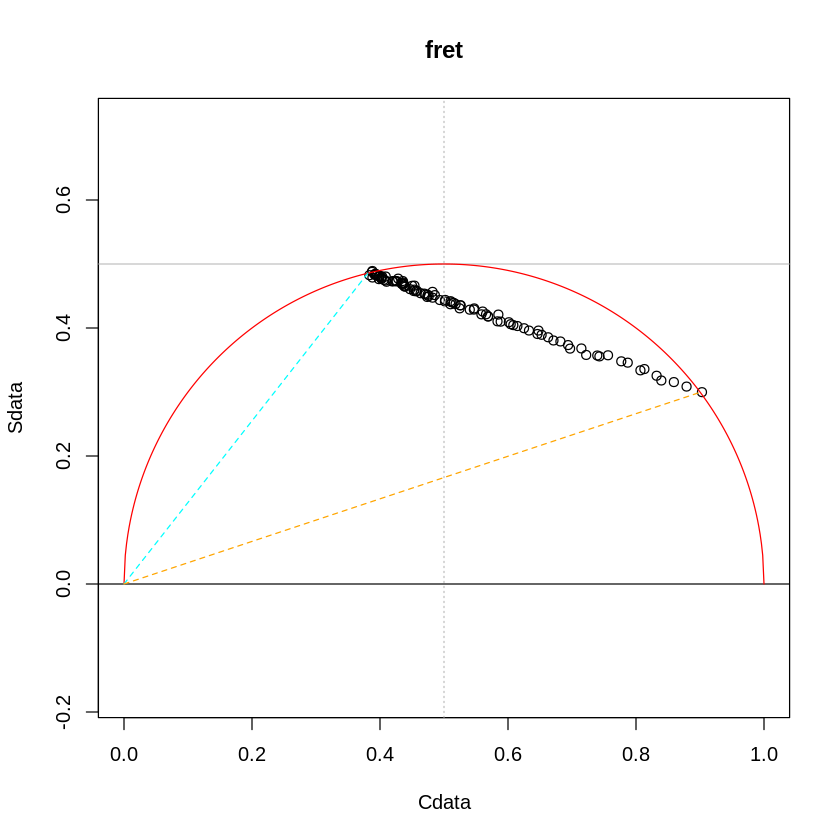

In [ ]:
nFluo = 30000           #this time, take a LOT of photons to minimize noise
freq = 3                #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
Tau = 3.8
TauQuenched = 1
binding = (0:100)/100   #% occupancy of FRET sensor
quenching = Tau/TauQuenched        #FRETting sensor is a factor 'quenching' dimmer. Naturally, the Tau is same fraction faster when FRETting.
aantal = length(binding)

Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 0:aantal){    #for each different binding %, do the next lines:
  unbindingFluo = nFluo*(1-binding[k])
  unbindingPhotons = unbindingFluo/quenching  # the bound sensors FRET, so they are quenched by a factor quenching
  bindingFluo = nFluo-unbindingFluo
  bindingPhotons = bindingFluo                # each of them emits a photon, i.e. quantum yield is assumed to be 1

  data = append(rexp(unbindingPhotons, 1/TauQuenched), rexp(bindingPhotons, 1/Tau))  #so, simulate bindingPhotons from exp distribution with Tau, and unbindingPhotons from exp distribution with TauQuenched
  Sdata[k] = sum((sin(data/freq)))/(bindingPhotons+unbindingPhotons)
  Cdata[k] = sum((cos(data/freq)))/(bindingPhotons+unbindingPhotons)
}
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55), main = "fret", asp = 1)

#embellishments. non-essential
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")
#next, we'll draw in the vectors for bound and unbound populations by simulating them for very high numbers of photons: 300000 each
nFluo = 300000
  data = (Tau*rexp(nFluo))
  yl = sum((sin(data/freq)))/nFluo  #(xl, yl)  = coordinate for long Tau
  xl = sum((cos(data/freq)))/nFluo
lines(c(0,xl),c(0,yl), col = "cyan", lty = 2)
  data = TauQuenched*rexp(nFluo)
  ys = sum((sin(data/freq)))/nFluo  #(xl, yl)  = coordinate for long Tau
  xs = sum((cos(data/freq)))/nFluo
lines(c(0,xs),c(0,ys), col = "orange", lty = 2)


Now, when 50% of sensors are bound, and the other half unbound, we just have to take weighted fractions of those vectors and 'head-to-tail' them, each with their characteristic angles. And I also do that for 25%  and 75% of sensors bound, respectively:


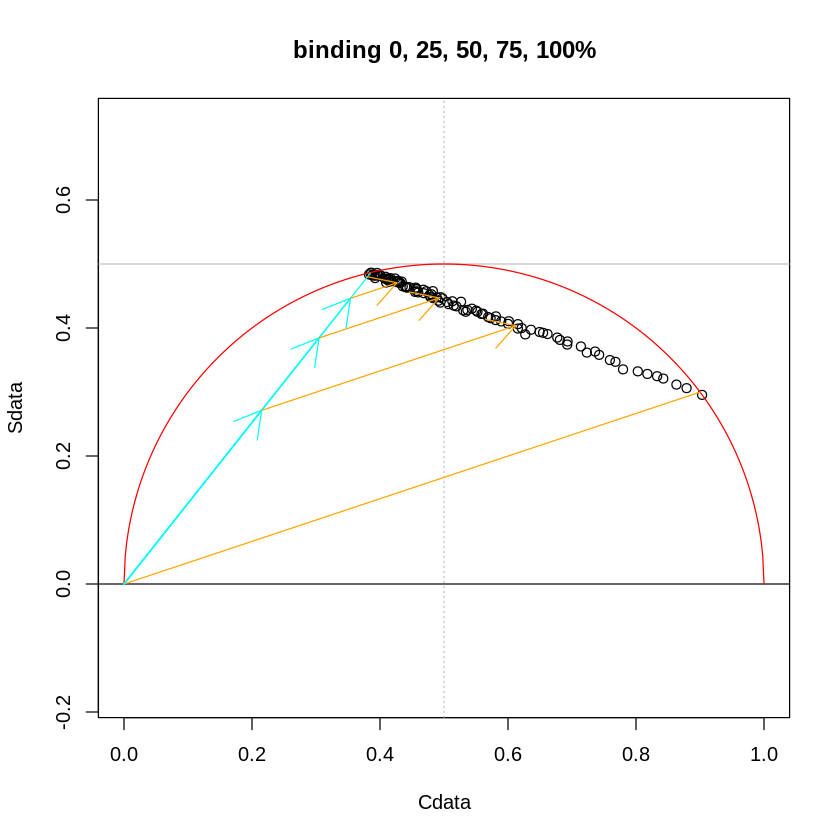

In [ ]:
nFluo = 30000           #this time, take a LOT of photons to minimize noise
freq = 3                #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
Tau = 3.8
TauQuenched = 1
binding = (0:100)/100   #% occupancy of FRET sensor
quenching = Tau/TauQuenched        #FRETting sensor is a factor 'quenching' dimmer. Naturally, the Tau is same fraction faster when FRETting.
aantal = length(binding)

Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 0:aantal){    #for each different binding %, do the next lines:
  unbindingFluo = nFluo*(1-binding[k])
  unbindingPhotons = unbindingFluo/quenching  # the bound sensors FRET, so they are quenched by a factor quenching
  bindingFluo = nFluo-unbindingFluo
  bindingPhotons = bindingFluo                # each of them emits a photon, i.e. quantum yield is assumed to be 1

  data = append(rexp(unbindingPhotons, 1/TauQuenched), rexp(bindingPhotons, 1/Tau))  #so, simulate bindingPhotons from exp distribution with Tau, and unbindingPhotons from exp distribution with TauQuenched
  Sdata[k] = sum((sin(data/freq)))/(bindingPhotons+unbindingPhotons)
  Cdata[k] = sum((cos(data/freq)))/(bindingPhotons+unbindingPhotons)
}

plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55), main = "binding 0, 25, 50, 75, 100%", asp = 1)

#embellishments. non-essential
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

#next, we'll draw in the vectors for bound and unbound populations by simulating them for very high numbers of photons
nFluo = 300000       #each exponent will consist of nFluo photons, drawn randomly from exp distribution
  data = (Tau*rexp(nFluo))
  yl = sum((sin(data/freq)))/nFluo  #(xl, yl)  = coordinate for long Tau
  xl = sum((cos(data/freq)))/nFluo
lines(c(0,xl),c(0,yl), col = "cyan", lty = 1)
  data = TauQuenched*rexp(nFluo)
  ys = sum((sin(data/freq)))/nFluo  #(xs, ys)  = coordinate for short Tau
  xs = sum((cos(data/freq)))/nFluo
lines(c(0,xs),c(0,ys), col = "orange", lty = 1)


#so far, identical to the previous block
#and we next draw in the head-to-tail vectors for mixes of exponents at 25%, 50% and 75% of unbinding sensors
#note that for 50% binding, nFluo*0.5 photons have Tau, while (nFluo*0.5)/quenching photons have TauQuenched!!!

oneUB = nFluo*0.75 / (nFluo*0.75 + (nFluo*0.25)/quenching)
oneB = ((nFluo*0.25)/quenching) / (nFluo*0.75 + (nFluo*0.25)/quenching)

twoUB = nFluo*0.5 / (nFluo*0.5 + (nFluo*0.5)/quenching)
twoB = ((nFluo*0.5)/quenching) / (nFluo*0.5 + (nFluo*0.5)/quenching)

threeUB = nFluo*0.25 / (nFluo*0.25 + (nFluo*0.75)/quenching)
threeB = ((nFluo*0.75)/quenching) / (nFluo*0.25 + (nFluo*0.75)/quenching)

arrows(0,0, oneUB*xl, oneUB*yl,col = "cyan")
arrows(oneUB*xl, oneUB*yl, oneUB*xl+oneB*xs, oneUB*yl+oneB*ys, col = "orange")

arrows(0,0, twoUB*xl, twoUB*yl,col = "cyan")
arrows(twoUB*xl, twoUB*yl, twoUB*xl+twoB*xs, twoUB*yl+twoB*ys, col = "orange")

arrows(0,0, threeUB*xl, threeUB*yl,col = "cyan")
arrows(threeUB*xl, threeUB*yl, threeUB*xl+threeB*xs, threeUB*yl+threeB*ys, col = "orange")

At each % binding, the length of each cyan arrow is proportional to fraction of total photons that is emitted by the unbound sensors, and the orange arrow is proportional to fraction of total photons emitted by the bound sensors. Note that the arrows for 50% binding are NOT just halfway, because quenching skews towards the unbound (brightest) sensors.

So: linear combinations of 2 vectors end up on a straigh line. This is true for FRET sensors changing between 2 states. Similarly, you can work out by head-to-tailing vectors WHY the autofluorescence graph (First codeblock in Part3) behaves the way it does. Remember, in that case, autofluo is a fixed amount of photons, not a varying fraction of the total fluorescence. If you feel dark-haired, try that on your own. Otherwise, Part 4, first code.





##FRET sensor with background
Finally, lets see what that looks like in the presence of some autofluorescence:

[1] 0.9730788 0.3832561 0.8996504
[1] 0.1617872 0.4865284 0.3002245


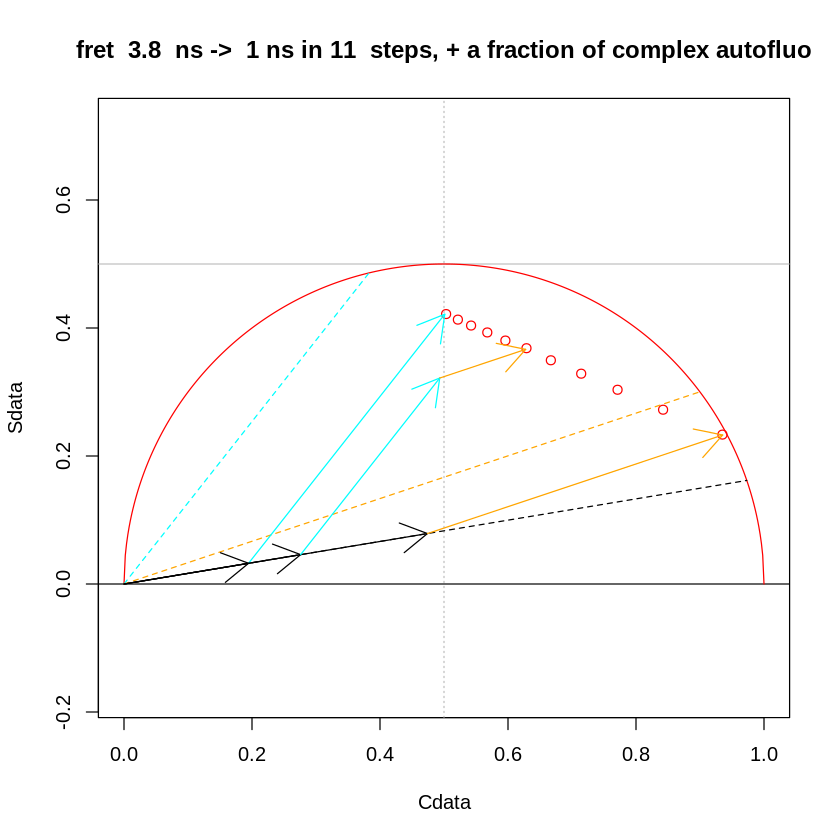

In [ ]:
#CODE GETS COMPLICATED??? NO!! 12 lines on setting parameters, then only 10 lines that do all the work.
#the remainder (from line 30 on) is just adding cosmetics!

nFluo = 300000     #each exponent will consist of nFluo photons, drawn randomly from exp distribution
freq = 3            #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
Tau = 3.8
TauQuenched = 1
binding = (0:10)/10    #% occupancy of FRET sensor
quenching = Tau/TauQuenched      #FRETting sensor is a factor quenching dimmer
TauBkGrnd = 0.5       #in this version, a fraction 'fractionBkGrnd' of all photons is due to BkGrnd with Tau = 0.5 ns
fractionBkGrnd = 0.2  #<<<<<<<<< THIS is the main one to play with

aantal = length(binding)
nFluoBkGrnd = round(nFluo*fractionBkGrnd)
nFluo = nFluo-nFluoBkGrnd
Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 0:aantal){
  unbindingFluo = nFluo*(1-binding[k])
  unbindingPhotons = unbindingFluo/quenching  # the bound sensors FRET, so they are quenched by a factor quenching
  bindingFluo = nFluo-unbindingFluo
  bindingPhotons = bindingFluo                # each of them emits a photon, i.e. quantum yield is assumed to be 1

  data = append(rexp(unbindingPhotons, 1/TauQuenched), rexp(bindingPhotons, 1/Tau))  #so, simulate bindingPhotons from exp distribution with Tau, and unbindingPhotons from exp distribution with TauQuenched
  data = append(data, TauBkGrnd*rexp(nFluoBkGrnd))
  Sdata[k] = sum(sin(data/freq))/(bindingPhotons+unbindingPhotons+nFluoBkGrnd)
  Cdata[k] = sum(cos(data/freq))/(bindingPhotons+unbindingPhotons+nFluoBkGrnd)
  #print(c(nFluo, unbindingPhotons, bindingPhotons, Sdata[k], Cdata[k]))
}
#to do: adapt the main title to actual parameters
txt = paste("fret ", Tau, " ns -> ", TauQuenched, "ns in", aantal, " steps, + a fraction of complex autofluo")
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55),main = txt,asp = 1, col = "red")

#embellishments. non-essential. Only try to read the vectorstuff below if you are really into R stuff
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

#<<<<IF YOU FIND THE CODE BELOW TOO COMPLICATED, it does not harm unsderstanding to just skip is.
#I am merely calculating how long each of the vectors need to be>>>>

#NEXT: draw vectors that are updated when parameters are changed. To determine angle of the vector first, I
#run for each of principal phasors with lots of photons
Ldata = c(TauBkGrnd, Tau, TauQuenched) #and we do this for BkGrnd, unbound and fully bound
Sdata = rep(3,0)        #initialize arrays that will contain the sine and cosine data
Cdata = rep(3,0)

for(l in 1:3){
  data = (Ldata[l]*rexp(5e5))
  Sdata[l] = sum((sin(data/freq)))/5e5
  Cdata[l] = sum((cos(data/freq)))/5e5
}

#from that, we get the end points of each for vector addition
print(Cdata) #Bkgrnd, long and short tau, respectively
print(Sdata)
lines(c(0,Cdata[1]),c(0,Sdata[1]), col = "black", lty = 2)  #dotted lines are the original data without background
lines(c(0,Cdata[2]),c(0,Sdata[2]), col = "cyan", lty = 2)
lines(c(0,Cdata[3]),c(0,Sdata[3]), col = "orange",lty = 2)

#now start plotting the head-to-tail vectors for some of the data:
#first no FRET
xb = fractionBkGrnd*Cdata[1] #xb is background x of arrow head.
yb = fractionBkGrnd*Sdata[1]
arrows(0,0,xb, yb, col = "black")
arrows(xb, yb, xb+(1-fractionBkGrnd)*Cdata[2], yb+(1-fractionBkGrnd)*Sdata[2], col = "cyan")

#next, full FRET. Because of quenching, the BkGrnd is now relatively more important:
fractb  =  (fractionBkGrnd*5e5)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*5e5/quenching)
xb = fractb*Cdata[1] #xb is background x or arrow head
yb = fractb*Sdata[1]
arrows(0,0,xb, yb, col = "black")
arrows(xb, yb, xb+(1-fractb)*Cdata[3], yb+(1-fractb)*Sdata[3], col = "orange")

#for middle value of the binding array, determine length of BkGrnd arrow:
bound = (binding[length(binding)]+binding[1])/2 #middle value of the binding array
fractb  =  (fractionBkGrnd*5e5)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*bound/quenching*5e5+ (1-fractionBkGrnd)*(1-bound)*5e5)
xb = fractb*Cdata[1]
yb = fractb*Sdata[1]
arrows(0,0,xb, yb, col = "black")

#next, determine which fraction of remaining fluo is unbound(cyan)
fractc = ((1-fractionBkGrnd)*(1-bound)*5e5)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*bound*5e5/quenching+(1-fractionBkGrnd)*(1-bound)*5e5)
xc = fractc*Cdata[2] #xc = no fret, so cyan
yc = fractc*Sdata[2]
arrows(xb, yb, xb+xc, yb+yc, col = "cyan")

fractd = ((1-fractionBkGrnd)*bound*5e5/quenching)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*bound*5e5/quenching+(1-fractionBkGrnd)*(1-bound)*5e5)
xd = fractd*Cdata[3] #xc = no fret, so cyan
yd = fractd*Sdata[3]
arrows(xb+xc, yb+yc, xb+xc+xd, yb+yc+yd,col = "orange")


The dashed lines are the pure vectors for low FRET (Cyan), high FRET (orange) and background (black), respectively. The solid lines show how the complex data points in the fret trajectory are built up by head-to-tailing weighted fractions of these.

By now, you should get the idea of this simulation: I simply append 3 populations of photons, the Hi-FRET, the Lo-FRET and autofluorescent populations (in 2 steps):

  `data = append(Tau ⋆ exp(unbindingPhotons), TauQuenched ⋆ rexp(bindingPhotons))`

  `data = append(data, TauBkGrnd*rexp(nFluoBkGrnd))`


The presence of autofluorescence shifts the line into the circle, just as you would expect by figuring out the head-to-tail addition of vectors.
>DO: play with the fraction of background and/or the Tau of the autofluorescence.

>DO: set the quenching to 1 and observe what that does with the spacing of the data points. Set it back to Tau/TauQuenched.

#Summary
In summary, you should have seen:

--phasors tell about lifetime, number of components and FRET sensors

--without requiring time-consuming exponential fitting

--trajectories tell you about underlying processes

--that in addition, the numerical simulation approach is incredibly flexible -and, I hope, intuitive. No math, just roll the photon dice and graph the results. It, on the fly, visualizes the consequences of Poisson noise in the photon arrival times. The examples shown here should cover most of the cases encountered during sensor experimentation.

>>>>>>   KJ, May 2023  Reactions to k.jalink@nki.nl

>>Disclaimer: This is my first Google colab and I am relatively new to R. Yet, if you see me making data like `data = 2*rexp(4000)` rather than `data = rexp(4000, 2)` that is on purpose. I think it makes it more clear to ATB dummies that there is no magic in making an exponential distribution with Tau of 2; you just multiply the photon arrival times with 2.

>>Thanks to Joachim Goedhart, Bram van den Broek, Tessa te Lintelo and Rolf Harkes for proof-reading and suggestions.



-

-




#PART 4. Extra assignments / for afficionados
In 3.1 I asked you to work out the phasors of lifetimes in combination with autofluorescence. Here is what you should have come up with:
First, run it with fractionBkGrnd = 0.0 and observe where the phasors for autofluo, and those for 1, 2, 4, 6, 10 ns end up on the hemicircle. Then run it again, with fractionBkGrnd =  0.2 (and then, with 0.4) and see how the vectors are a simple addition of the weighted vectors for autofluo (0.5 ns) and each of the others.

 [1]  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  1.0  1.0  1.0  1.0
[16]  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
[31]  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  6.0  6.0  6.0  6.0  6.0
[46]  6.0  6.0  6.0  6.0  6.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0


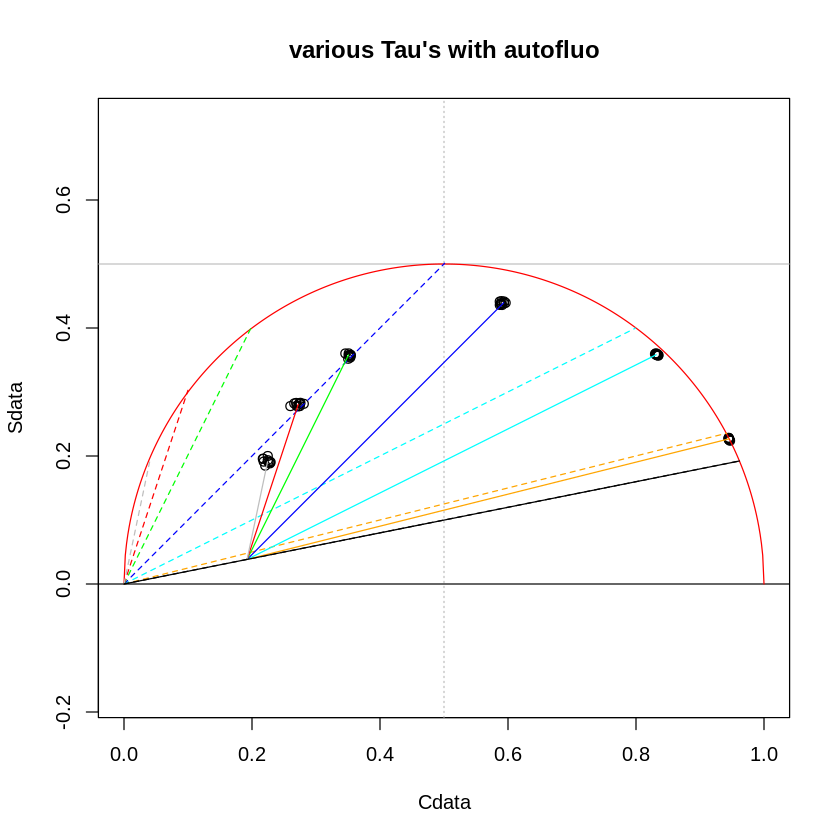

In [ ]:
nFluo = 30000         #each exponent will consist of nFluo photons, drawn randomly from exp distribution
freq = 2              #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
TauBkGrnd = 0.4       #in this version, a fraction 'fractionBkGrnd' of those photons actually derive from BkGrnd with Tau = 0.4 ns
fractionBkGrnd = 0.2  #<<<<<<<<< THIS is the one to play with
nFluoBkGrnd  =  round(nFluo*fractionBkGrnd)
nFluo = nFluo-nFluoBkGrnd
Ldata = rep(c(0.5, 1,2,4,6,10), each = 10)   #DO NOT PLAY WITH THIS!!! run the simulation for each of the Tau's in Ldata.
aantal = length(Ldata)
print(Ldata)

#initialize 2 arrays that will contain the sine and cosine data
Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 1:aantal){
  data = append((Ldata[k]*rexp(nFluo)), TauBkGrnd*rexp(nFluoBkGrnd))  #part of the photons from Fluo, part from BkGrnd
  Sdata[k] = sum((sin(data/freq)))/(nFluo+nFluoBkGrnd)
  Cdata[k] = sum((cos(data/freq)))/(nFluo+nFluoBkGrnd)
}
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55), main = "various Tau's with autofluo", asp = 1)

#embellishments. non-essential
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

#now generate the data corresponding to zero bkGrnd to allow plotting the vectors. This is merely a repeat of above
#I generate the Xn and Yn coordinates for large nr of photons to be able to draw the vectors
#it is not necessary to understand the code below but feel free to figure out what I am doing
nFluo = 100000
Ldata = c(0.5, 1,2,4,6,10, TauBkGrnd)    #we must run the simulation for each of the Tau's in Ldata.
aantal = length(Ldata)
Sdata = rep(aantal,0)  #note that I already have plotted the data, so I just reuse the same variable names
Cdata = rep(aantal,0)

for(k in 1:aantal){
  data = (Ldata[k]*rexp(nFluo))  #all photons are from sensor
  Sdata[k] = sum((sin(data/freq)))/nFluo
  Cdata[k] = sum((cos(data/freq)))/nFluo
}

lines(c(0,Cdata[1]),c(0,Sdata[1]), col = "orange", lty = 2) #W/O autofluo
lines(c(0,Cdata[2]),c(0,Sdata[2]), col = "cyan", lty = 2)
lines(c(0,Cdata[3]),c(0,Sdata[3]), col = "blue", lty = 2)
lines(c(0,Cdata[4]),c(0,Sdata[4]), col = "green", lty = 2)
lines(c(0,Cdata[5]),c(0,Sdata[5]), col = "red", lty = 2)
lines(c(0,Cdata[6]),c(0,Sdata[6]), col = "gray", lty = 2)
lines(c(0,Cdata[7]),c(0,Sdata[7]), col = "black", lty = 2)
#idem With autofluo
f = fractionBkGrnd
lines(c((f*Cdata[7]),(f*Cdata[7]+(1-f)*Cdata[1])),c(f*Sdata[7], (f*Sdata[7]+(1-f)*Sdata[1])), col = "orange")
lines(c((f*Cdata[7]),(f*Cdata[7]+(1-f)*Cdata[2])),c(f*Sdata[7], (f*Sdata[7]+(1-f)*Sdata[2])), col = "cyan")
lines(c((f*Cdata[7]),(f*Cdata[7]+(1-f)*Cdata[3])),c(f*Sdata[7], (f*Sdata[7]+(1-f)*Sdata[3])), col = "blue")
lines(c((f*Cdata[7]),(f*Cdata[7]+(1-f)*Cdata[4])),c(f*Sdata[7], (f*Sdata[7]+(1-f)*Sdata[4])), col = "green")
lines(c((f*Cdata[7]),(f*Cdata[7]+(1-f)*Cdata[5])),c(f*Sdata[7], (f*Sdata[7]+(1-f)*Sdata[5])), col = "red")
lines(c((f*Cdata[7]),(f*Cdata[7]+(1-f)*Cdata[6])),c(f*Sdata[7], (f*Sdata[7]+(1-f)*Sdata[6])), col = "gray")
lines(c(0,Cdata[7]),c(0.0,Sdata[7]), col = "black")

I have made the graph to plot the vectors to the lifetimes without autofluorescence (dashed), and in the same color, the vectors with fractionBkGrnd autofluorescence ending at the clusters of data points for 0.5 ns (orange), 1 ns (cyan), 2 ns (blue), 4 ns (green), 6 ns (red) and 10 ns (gray). The bkGrnd vector is in black. You can play with TauBkGrnd, fractionBkGrnd, nFluo and freq, but leave Ldata (the set of lifetimes to plot) in peace.





#Comparing it to Gratton-lab FRET trajectories.

What is all the fuzz of the curved FRET trajectories introduced by Digman and Gratton and colleagues (Biophys J. 2008)? Why do we never see those in practise, while their math is indisputably right (I think 😀)?  One difference is that they use complex background fluorescence with a phasor well within the hemicircle. So lets add that:


[1] 0.97299277 0.38553143 0.90024682 0.08233156
[1] 0.1621481 0.4859065 0.2996182 0.2764799


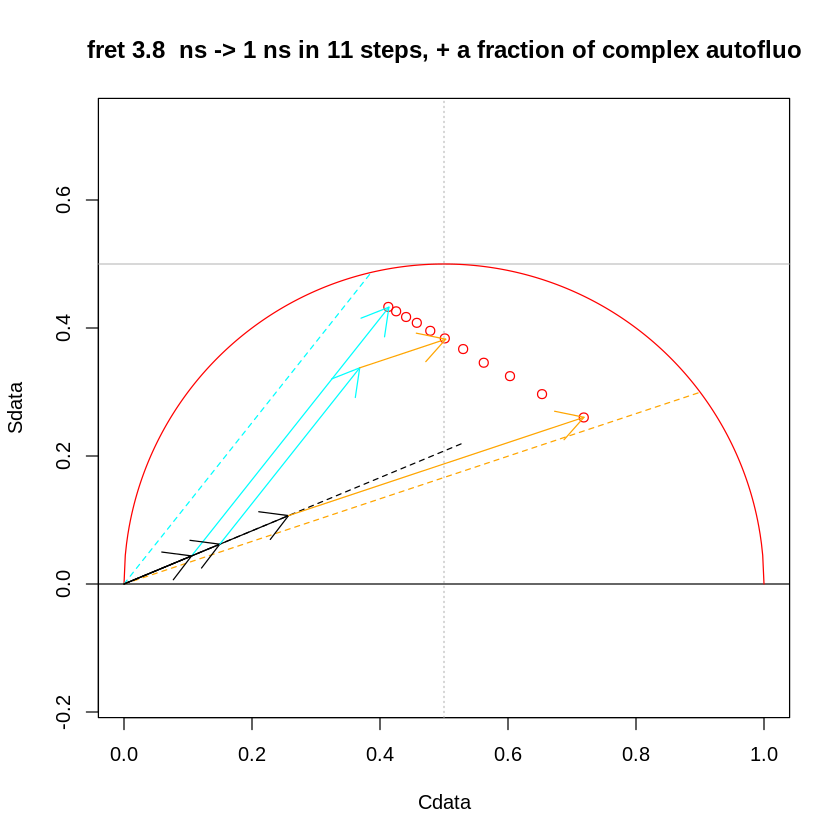

In [ ]:
nFluo = 300000         #each exponent will consist of nFluo photons, drawn randomly from exp distribution
freq = 3               #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
Tau = 3.8
TauQuenched = 1
binding = (0:10)/10              #fraction occupancy of FRET sensor
quenching = Tau/TauQuenched      #FRETting sensor is a factor quenching dimmer
TauBkGrnd = 0.5
TauBkGrndLong = 10
fractionBkGrnd = 0.2             #<<<<<<<<< THIS is the main one to play with. In this version, a fraction 'fractionBkGrnd' of all photons is due to BkGrnd
fractionLongBkGrnd = 0.5         #and a fraction fractionLongBkGrnd OF THAT(!) is the longer Tau background.

aantal = length(binding)
nFluoBkGrnd = round(nFluo*fractionBkGrnd)
nFluo = nFluo-nFluoBkGrnd
Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 0:aantal){
  unbindingFluo = nFluo*(1-binding[k])
  unbindingPhotons=unbindingFluo/quenching
  bindingFluo = nFluo - unbindingFluo
  bindingPhotons = bindingFluo

  data = append(Tau*rexp(bindingPhotons), TauQuenched*rexp(unbindingPhotons))
  data = append(data, TauBkGrnd*rexp(nFluoBkGrnd*(1-fractionLongBkGrnd))) #Here we changed the model to fractionLongBkGrnd BkGrnd of 0.5 (1-fractionLongBkGrnd) BkGrnd of 10 ns
  data = append(data, TauBkGrndLong*rexp(nFluoBkGrnd*fractionLongBkGrnd))
  Sdata[k] = sum(sin(data/freq))/(bindingPhotons+unbindingPhotons+nFluoBkGrnd)
  Cdata[k] = sum(cos(data/freq))/(bindingPhotons+unbindingPhotons+nFluoBkGrnd)
  #print(c(nFluo, unbindingPhotons, bindingPhotons, Sdata[k], Cdata[k]))
}

txt = paste("fret", Tau, " ns ->", TauQuenched, "ns in", aantal, "steps, + a fraction of complex autofluo")
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55),main = txt,asp = 1, col = "red")

#embellishments. non-essential. Only try to read the vectorstuff below if you are really into R stuff
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

#<<<<IF YOU FIND THE CODE BELOW TOO COMPLICATED, it does not harm unsderstanding to just skip is.
#I am merely calculating how long each of the vectors need to be>>>>

#NEXT: draw vectors that are updated when parameters are changed. To determine angle of the vector first, I
#run for each of principal phasors with lots of photons
###############################TauBkGrndLong = 10
Ldata = c(TauBkGrnd, Tau, TauQuenched, TauBkGrndLong) #and we do this for BkGrnd, unbound and fully bound
Sdata = rep(4,0)        #initialize arrays that will contain the sine and cosine data
Cdata = rep(4,0)

for(l in 1:4){
  data = (Ldata[l]*rexp(5e5))
  Sdata[l] = sum((sin(data/freq)))/5e5
  Cdata[l] = sum((cos(data/freq)))/5e5
}

#from that, we get the end points of each for vector addition
print(Cdata) #Bkgrnd, long and short tau, respectively
print(Sdata)
#now introduce complex background fluo, 10% of 0.5 ns and 10% of 8 ns e.g.
lines(c(0,(Cdata[1]*(1-fractionLongBkGrnd)+Cdata[4]*fractionLongBkGrnd)),c(0,(Sdata[1]*(1-fractionLongBkGrnd)+Sdata[4]*fractionLongBkGrnd)), col = "black", lty = 2)  #dotted lines are the original data without background
lines(c(0,Cdata[2]),c(0,Sdata[2]), col = "cyan", lty = 2)
lines(c(0,Cdata[3]),c(0,Sdata[3]), col = "orange",lty = 2)

#now start plotting the head-to-tail vectors for some of the data:
#first no FRET
xb = fractionBkGrnd*(Cdata[1]*(1-fractionLongBkGrnd)+Cdata[4]*fractionLongBkGrnd) #xb is background x of arrow head.
yb = fractionBkGrnd*(Sdata[1]*(1-fractionLongBkGrnd)+Sdata[4]*fractionLongBkGrnd)
arrows(0,0,xb, yb, col = "black")
arrows(xb, yb, xb+(1-fractionBkGrnd)*Cdata[2], yb+(1-fractionBkGrnd)*Sdata[2], col = "cyan")

#next, full FRET. Because of quenching, the BkGrnd is now relatively more important:
fractb  =  (fractionBkGrnd*5e5)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*5e5/quenching)
xb = fractb*(Cdata[1]*(1-fractionLongBkGrnd)+Cdata[4]*fractionLongBkGrnd) #xb is background x or arrow head
yb = fractb*(Sdata[1]*(1-fractionLongBkGrnd)+Sdata[4]*fractionLongBkGrnd)
arrows(0,0,xb, yb, col = "black")
arrows(xb, yb, xb+(1-fractb)*Cdata[3], yb+(1-fractb)*Sdata[3], col = "orange")

#for middle value of the binding array, determine length of BkGrnd arrow:
bound = (binding[length(binding)]+binding[1])/2 #middle value of the binding array
fractb  =  (fractionBkGrnd*5e5)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*bound/quenching*5e5+ (1-fractionBkGrnd)*(1-bound)*5e5)
xb = fractb*(Cdata[1]*(1-fractionLongBkGrnd)+Cdata[4]*fractionLongBkGrnd) #xb is background x or arrow head
yb = fractb*(Sdata[1]*(1-fractionLongBkGrnd)+Sdata[4]*fractionLongBkGrnd)
arrows(0,0,xb, yb, col = "black")

#next, determine which fraction of remaining fluo is unbound(cyan)
fractc = ((1-fractionBkGrnd)*(1-bound)*5e5)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*bound*5e5/quenching+(1-fractionBkGrnd)*(1-bound)*5e5)
xc = fractc*Cdata[2] #xc = no fret, so cyan
yc = fractc*Sdata[2]
arrows(xb, yb, xb+xc, yb+yc, col = "cyan")

fractd = ((1-fractionBkGrnd)*bound*5e5/quenching)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*bound*5e5/quenching+(1-fractionBkGrnd)*(1-bound)*5e5)
xd = fractd*Cdata[3] #xc = no fret, so cyan
yd = fractd*Sdata[3]
arrows(xb+xc, yb+yc, xb+xc+xd, yb+yc+yd,col = "orange")

So here I introduced compound autofluorescence (black dotted line), e.g. 10% of photons with 0.5 ns and 10% of photons with 10 ns, and added that to the FRET sensor trajectory. Long story short, whatever I do, however I change the parameters, I do not get a curved trajectory.

Well, that's because we use the more common 2-state model for the FRET sensor, i.e. a model switching between a high and a low FRET state. Examine what would happen when we substitute that for a single-state FLIM sensor that gradually changes lifetime and looses brightness accordingly:


  [1] 0.100 0.137 0.174 0.211 0.248 0.285 0.322 0.359 0.396 0.433 0.470 0.507
 [13] 0.544 0.581 0.618 0.655 0.692 0.729 0.766 0.803 0.840 0.877 0.914 0.951
 [25] 0.988 1.025 1.062 1.099 1.136 1.173 1.210 1.247 1.284 1.321 1.358 1.395
 [37] 1.432 1.469 1.506 1.543 1.580 1.617 1.654 1.691 1.728 1.765 1.802 1.839
 [49] 1.876 1.913 1.950 1.987 2.024 2.061 2.098 2.135 2.172 2.209 2.246 2.283
 [61] 2.320 2.357 2.394 2.431 2.468 2.505 2.542 2.579 2.616 2.653 2.690 2.727
 [73] 2.764 2.801 2.838 2.875 2.912 2.949 2.986 3.023 3.060 3.097 3.134 3.171
 [85] 3.208 3.245 3.282 3.319 3.356 3.393 3.430 3.467 3.504 3.541 3.578 3.615
 [97] 3.652 3.689 3.726 3.763 3.800
[1] 0.97304335 0.38258822 0.99889120 0.08276554
[1] 0.1623395 0.4858144 0.0332666 0.2758956


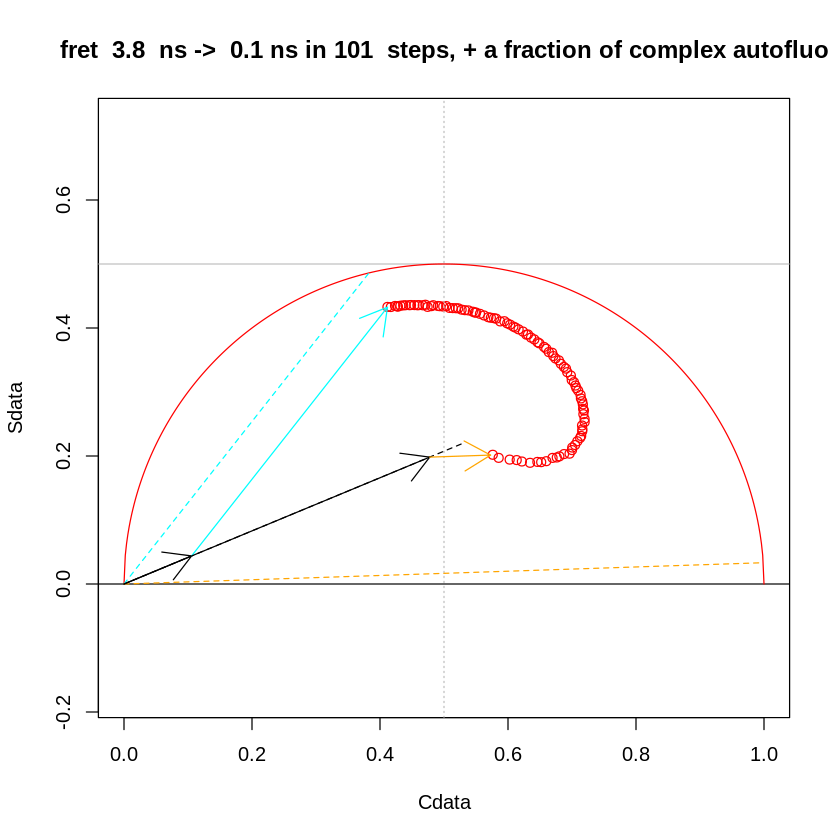

In [ ]:
#alternate FLIM sensor model: lifetime changes, only one state is present at any time:
nFluo = 300000      #each exponent will consist of nFluo photons, drawn randomly from exp distribution
freq = 3            #in addition, we can choose the freq of the sine and cosine we are using for the multiplication.
Tau = 3.8
TauQuenched = 0.1
allTaus = TauQuenched + ((0:100)/100)*(Tau-TauQuenched)         # Lifetimes within span of sensor
print(allTaus)
quenching = Tau/TauQuenched      #FRETting sensor is a factor quenching dimmer
TauBkGrnd = 0.5       #in this version, a fraction 'fractionBkGrnd' of all photons is due to Bkgrounds of 0.5 ns and 10 ns
TauBkGrndLong = 10
fractionBkGrnd = 0.2  #<<<<<<<<< THIS is the main one to play with
fractionLongBkGrnd = 0.5

aantal = length(allTaus)
nFluoBkGrnd = round(nFluo*fractionBkGrnd)
nFluo = nFluo-nFluoBkGrnd
Sdata = rep(aantal,0)
Cdata = rep(aantal,0)

for(k in 0:aantal){
  thisTau = allTaus[k]
  thisBrightness = nFluo/(Tau/allTaus[k])
  data = append(thisTau*rexp(thisBrightness), TauBkGrnd*rexp(nFluoBkGrnd*(1-fractionLongBkGrnd))) #Here we changed the model to (1-fractionLongBkGrnd) BkGrnd of 0.5, fractionLongBkGrnd BkGrnd of 10 ns
  data = append(data, TauBkGrndLong*rexp(nFluoBkGrnd*fractionLongBkGrnd))
  Sdata[k] = sum(sin(data/freq))/(thisBrightness+nFluoBkGrnd)
  Cdata[k] = sum(cos(data/freq))/(thisBrightness+nFluoBkGrnd)
}
#to do: adapt the main title to actual parameters
txt = paste("fret ", Tau, " ns -> ", TauQuenched, "ns in", aantal, " steps, + a fraction of complex autofluo")
plot(Cdata, Sdata, xlim = c(0,1), ylim = c(0,0.55),main = txt, asp = 1, col = "red")

#embellishments. non-essential. Only try to read the vectorstuff below if you are really into R stuff
grid(nx = 2, ny = 0, col = "gray")
lines(c(-0.1,1.1),c(0,0))
lines(c(-0.1, 1.1), c(0.5,0.5), col = "grey")
Xc = 0:500
Xc = Xc/500
Yc = sqrt(0.25-((Xc-0.5)^2)) #draw a quick circle in base R
lines(Xc, Yc, col = "red")

#<<<<IF YOU FIND THE CODE BELOW TOO COMPLICATED, it does not harm unsderstanding to just skip is.
#I am merely calculating how long each of the vectors need to be>>>>

#NEXT: draw vectors that are updated when parameters are changed. To determine angle of the vector first, I
#run for each of principal phasors with lots of photons
TauBkGrndLong = 10
Ldata = c(TauBkGrnd, Tau, TauQuenched, TauBkGrndLong) #and we do this for BkGrnd, unbound and fully bound
Sdata = rep(4,0)        #initialize arrays that will contain the sine and cosine data
Cdata = rep(4,0)

for(l in 1:4){
  data = (Ldata[l]*rexp(5e5))
  Sdata[l] = sum((sin(data/freq)))/5e5
  Cdata[l] = sum((cos(data/freq)))/5e5
}

#from that, we get the end points of each for vector addition
print(Cdata) #Bkgrnd, long and short tau, respectively
print(Sdata)
#now introduce complex background fluo, 10% of 0.5 ns and 10% of 8 ns e.g.
lines(c(0,(Cdata[1]*(1-fractionLongBkGrnd)+Cdata[4]*fractionLongBkGrnd)),c(0,(Sdata[1]*(1-fractionLongBkGrnd)+Sdata[4]*fractionLongBkGrnd)), col = "black", lty = 2)  #dotted lines are the original data without background
lines(c(0,Cdata[2]),c(0,Sdata[2]), col = "cyan", lty = 2)
lines(c(0,Cdata[3]),c(0,Sdata[3]), col = "orange",lty = 2)

#now start plotting the head-to-tail vectors for some of the data:
#first no FRET
xb = fractionBkGrnd*(Cdata[1]*(1-fractionLongBkGrnd)+Cdata[4]*fractionLongBkGrnd) #xb is background x of arrow head.
yb = fractionBkGrnd*(Sdata[1]*(1-fractionLongBkGrnd)+Sdata[4]*fractionLongBkGrnd)
arrows(0,0,xb, yb, col = "black")
arrows(xb, yb, xb+(1-fractionBkGrnd)*Cdata[2], yb+(1-fractionBkGrnd)*Sdata[2], col = "cyan")

#next, full FRET. Because of quenching, the BkGrnd is now relatively more important:
fractb  =  (fractionBkGrnd*5e5)/(fractionBkGrnd*5e5 + (1-fractionBkGrnd)*5e5/quenching)
xb = fractb*(Cdata[1]*(1-fractionLongBkGrnd)+Cdata[4]*fractionLongBkGrnd) #xb is background x or arrow head
yb = fractb*(Sdata[1]*(1-fractionLongBkGrnd)+Sdata[4]*fractionLongBkGrnd)
arrows(0,0,xb, yb, col = "black")
arrows(xb, yb, xb+(1-fractb)*Cdata[3], yb+(1-fractb)*Sdata[3], col = "orange")


Dashed cyan, orange and black lines are the phasors for Tau, TauQuenched and compound background, respectively. In the absence of background, red data points would all be on the hemicircle. Note that the compound background puls the datapoints in the circle and curves them extra towards the background phasor, simply because we loose most sensor photons due to high quenching in the low-lifetime state.

Once again, this model is much less common and we mostly don't see this in biological systems. But isn't it cool how simple simulations allow you to understand what is happening?



>>DISCLAIMER. This concludes the theoretical treatment of phasor plots. Please be aware that in the ***practical *** application, some restrictions may apply. Especially, instrument calibration may be necessary before the phasor can be calculated. That is because it must be known to the software at what moment the laser excitation pulse arrives before it can calculate the positions of the phasors.
